# Machine Learning project in Pytorch

This notebook shows the workflow for building, training and testing a custom model class in Pytorch using custom data sets.
And for saving the best model using Pytorch Ignite.
The code reads the files contained within the specified folders (train/test/val) and creates labels
which are saved as CSV files in the current working directory.
Then a custom data loader class is created for training, validation and testing.

Each is fed into a data loader.

And the model is trained. 

After training each model created is tested against data which is a subset of the original data.

Each model is then tested against data from a completely different data set.

The best model can then be chosen and fine tuned or trained on other data.

In [1]:
### Libraries and dependencies
import imagehash
import os,random
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from ignite.handlers import Checkpoint
from PIL import Image
from torchvision.transforms import v2
from torch.utils.data import Dataset
from torchvision.transforms import ToTensor
from torchvision.io import read_image
from torch import nn
from torch.utils.data import DataLoader
from torchvision.transforms import Compose, Normalize, ToTensor
from ignite.engine import Engine, Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Accuracy, Loss
from ignite.handlers import ModelCheckpoint
from ignite.contrib.handlers import TensorboardLogger, global_step_from_engine
from ignite.handlers import Timer, BasicTimeProfiler, HandlersTimeProfiler
import warnings
warnings.filterwarnings('ignore')

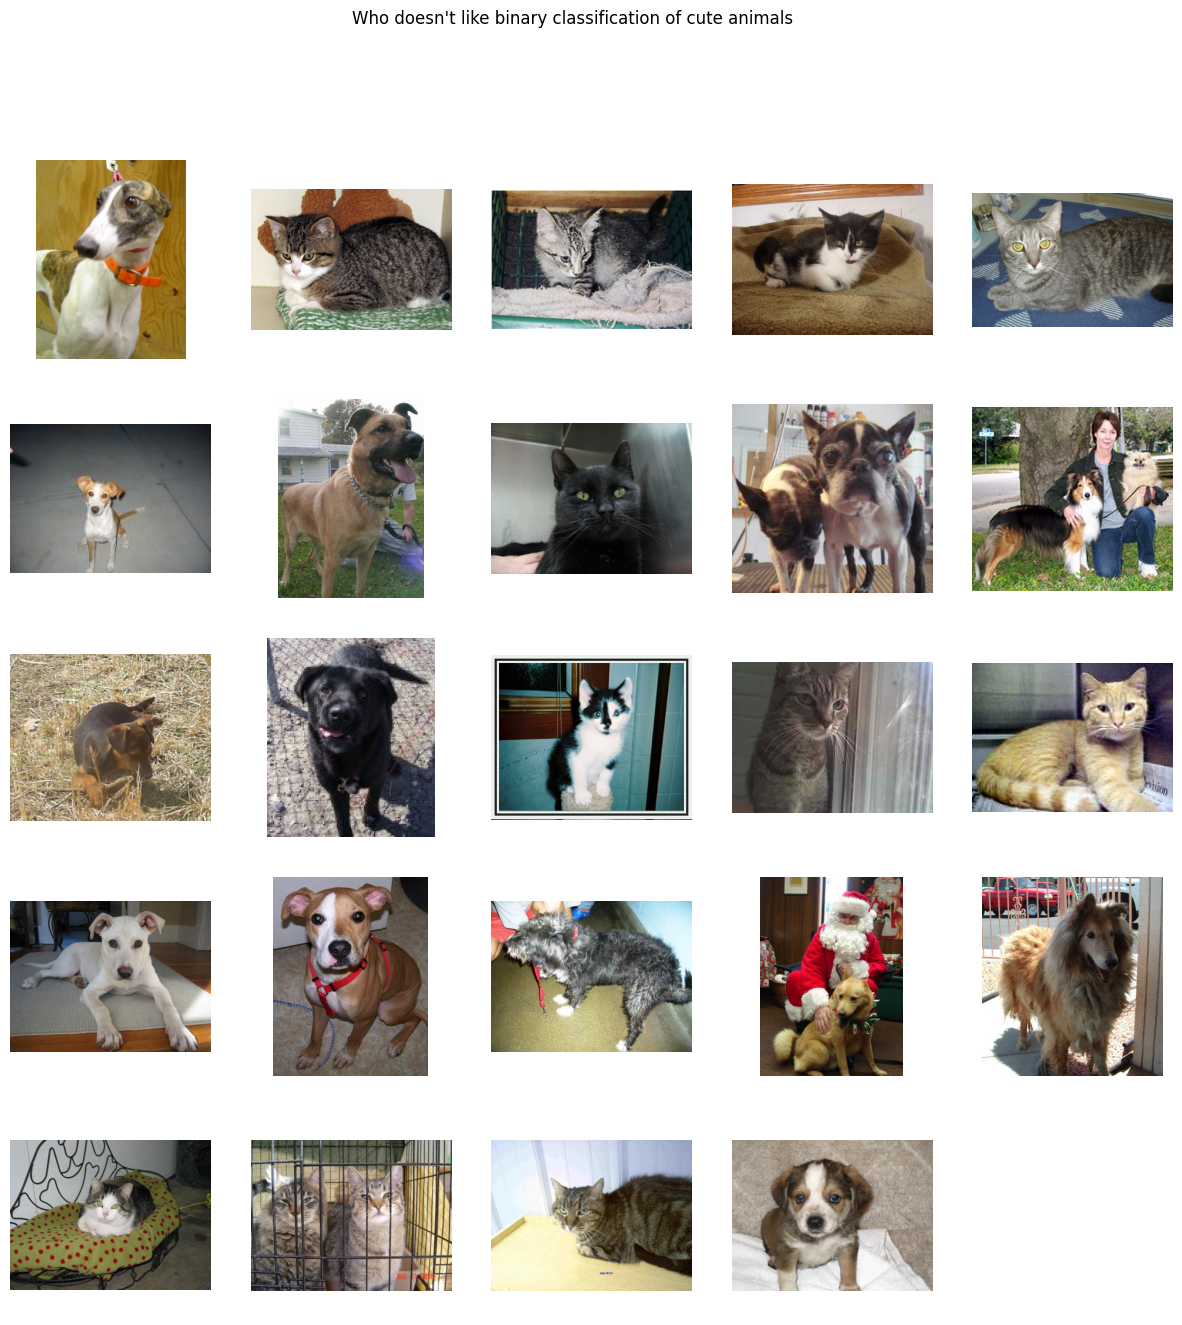

In [39]:
larger_list=[]
directory = os.path.join(os.getcwd(), 'train')

q = 1
fig,ax = plt.subplots(figsize=(15,15))
for i in range(0,(25)):
    random_file = random.choice(os.listdir(directory))
    abc=(os.path.join(directory, random_file)) #<- get the first file name
    picture = Image.open(abc) #<- reading those images
    plt.subplot(5,5,q) #<- you know that is so neat I am leaving it in
    plt.axis('off')
    title =("Who doesn't like binary classification of cute animals")
    plt.imshow(picture)
    plt.suptitle(title)
    ax.set_axis_off() 
    q+=1 #<- Make it so there are not so many files
    #print(q) #<- So I know it is not running forver
    if q ==25:
       break

In [ ]:
#Originally everything was in the same folder and cleaning was done in another notebook. 

directory1 = os.path.join(os.getcwd()+'train')

list_for_hashing = []
files_to_keep = []
files_to_purge = []
files_to_purge1 = []
for file in os.listdir(directory1):
    image1=imagehash.average_hash(Image.open(os.path.join(directory1,file)))
    if image1 not in list_for_hashing:
        list_for_hashing.append(image1)
        files_to_keep.append(file)
    else:
        print(file,image1)
        files_to_purge.append([file,image1])
        files_to_purge1.append(image1)

In [ ]:
zipped = list(zip(files_to_keep, list_for_hashing))
m=pd.DataFrame(zipped)
q = pd.DataFrame(files_to_purge)
pqm= q.merge(m, on = 1, how = 'inner')
file_list = list(pqm['0_x'])
file_list1 = list(pqm['0_y'])

In [ ]:
from matplotlib import pyplot as plt
larger_list=[]
directory= (os.getcwd()+'\PetImages\Cat')
q = 1
lengths1=len(pqm)
fig,ax = plt.subplots(figsize=(15,15))
for i in os.listdir(directory):
    if i in file_list:
        abc=(os.path.join(directory, i))
        picture = Image.open(abc) #<- reading those images
        plt.subplot(8,8,q) #<- you know that is so neat I am leaving it in
        plt.axis('off')
        title =("Who doesn't like binary classification of cute animals")
        plt.imshow(picture)
        plt.suptitle(title)
        ax.set_axis_off() 
        q+=1 #<- Make it so there are not so many files

In [40]:

pixel_values1=[]
widths_cat=[]
heights_cat=[]
widths_dog=[]
heights_dog=[]
traindir= directory
partial_string = 'og'
for img in os.listdir(traindir):
    if 'og' in img:
        img_path = os.path.join(traindir +'\\'+img ) # Making image file path
        im = Image.open(img_path)
        widths_dog.append(im.size[0])
        heights_dog.append(im.size[1])
        pixel_values1 = list(im.getdata())
    else:
        img_path = os.path.join(traindir +'\\'+img ) # Making image file path
        im = Image.open(img_path)
        widths_cat.append(im.size[0])
        heights_cat.append(im.size[1])
        pixel_values2 = list(im.getdata())

In [41]:
pixel_vals_b_dog = [x[0] for x in pixel_values1]
pixel_vals_g_dog = [x[1] for x in pixel_values1]
pixel_vals_r_dog = [x[2] for x in pixel_values1]
pixel_vals_b_cat = [x[0] for x in pixel_values2]
pixel_vals_g_cat = [x[1] for x in pixel_values2]
pixel_vals_r_cat = [x[2] for x in pixel_values2]

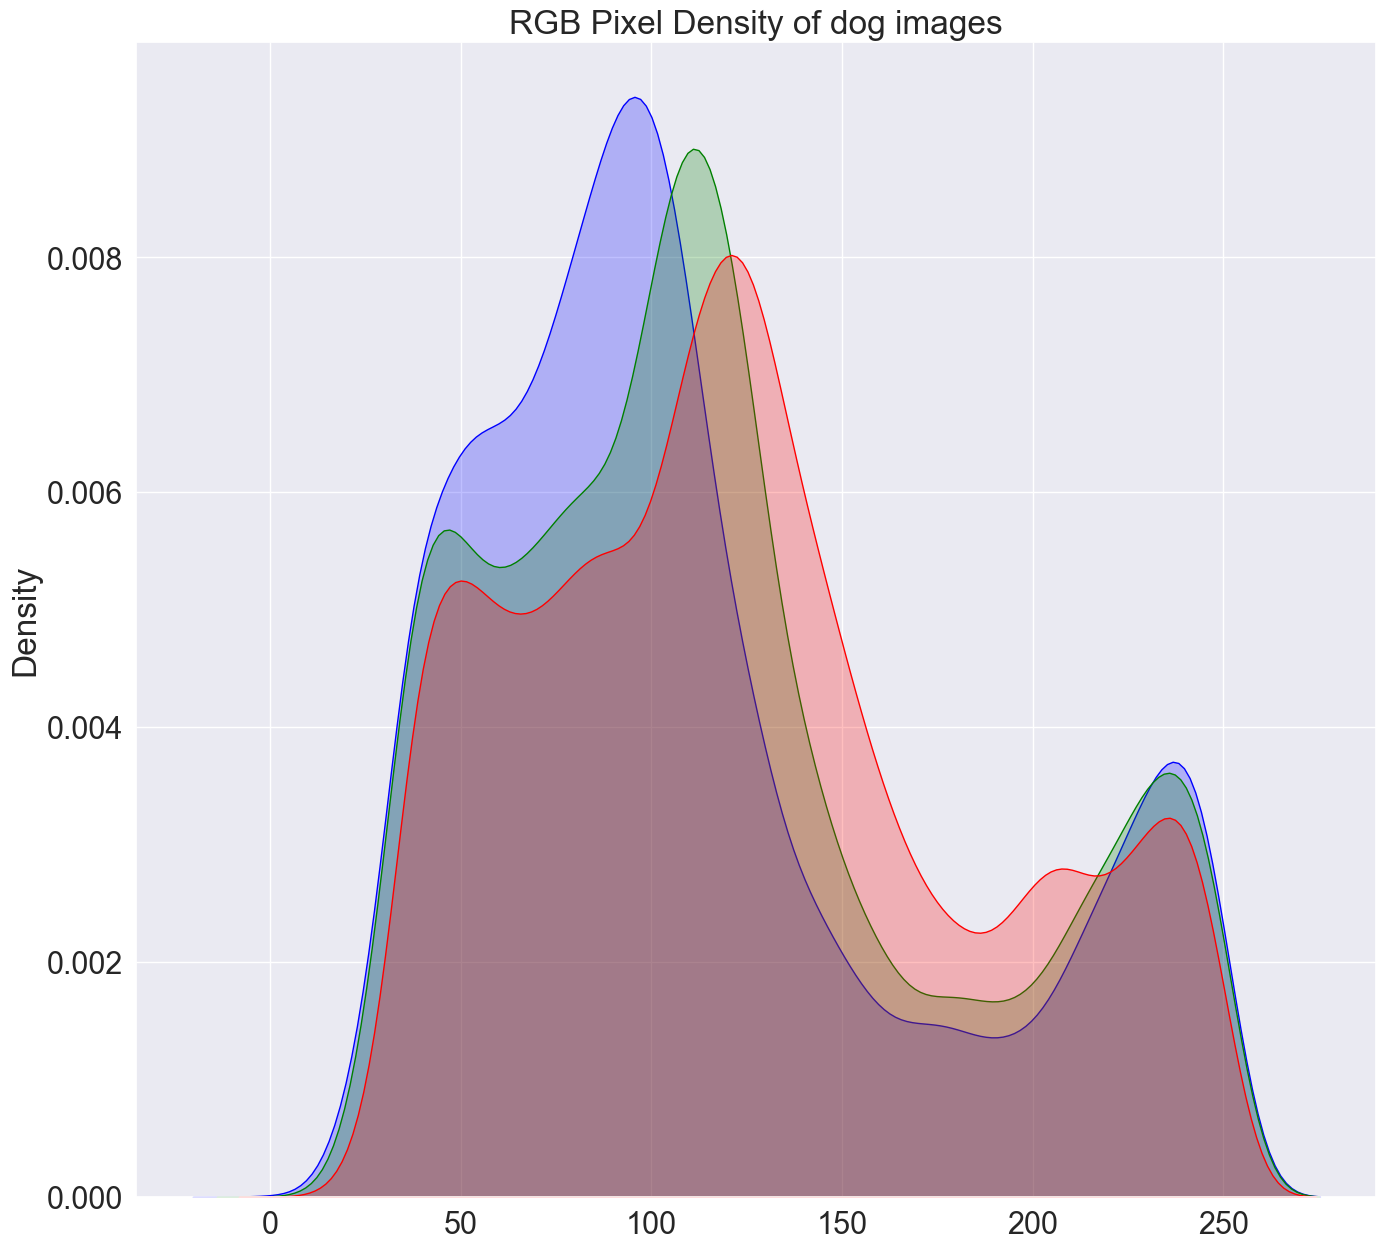

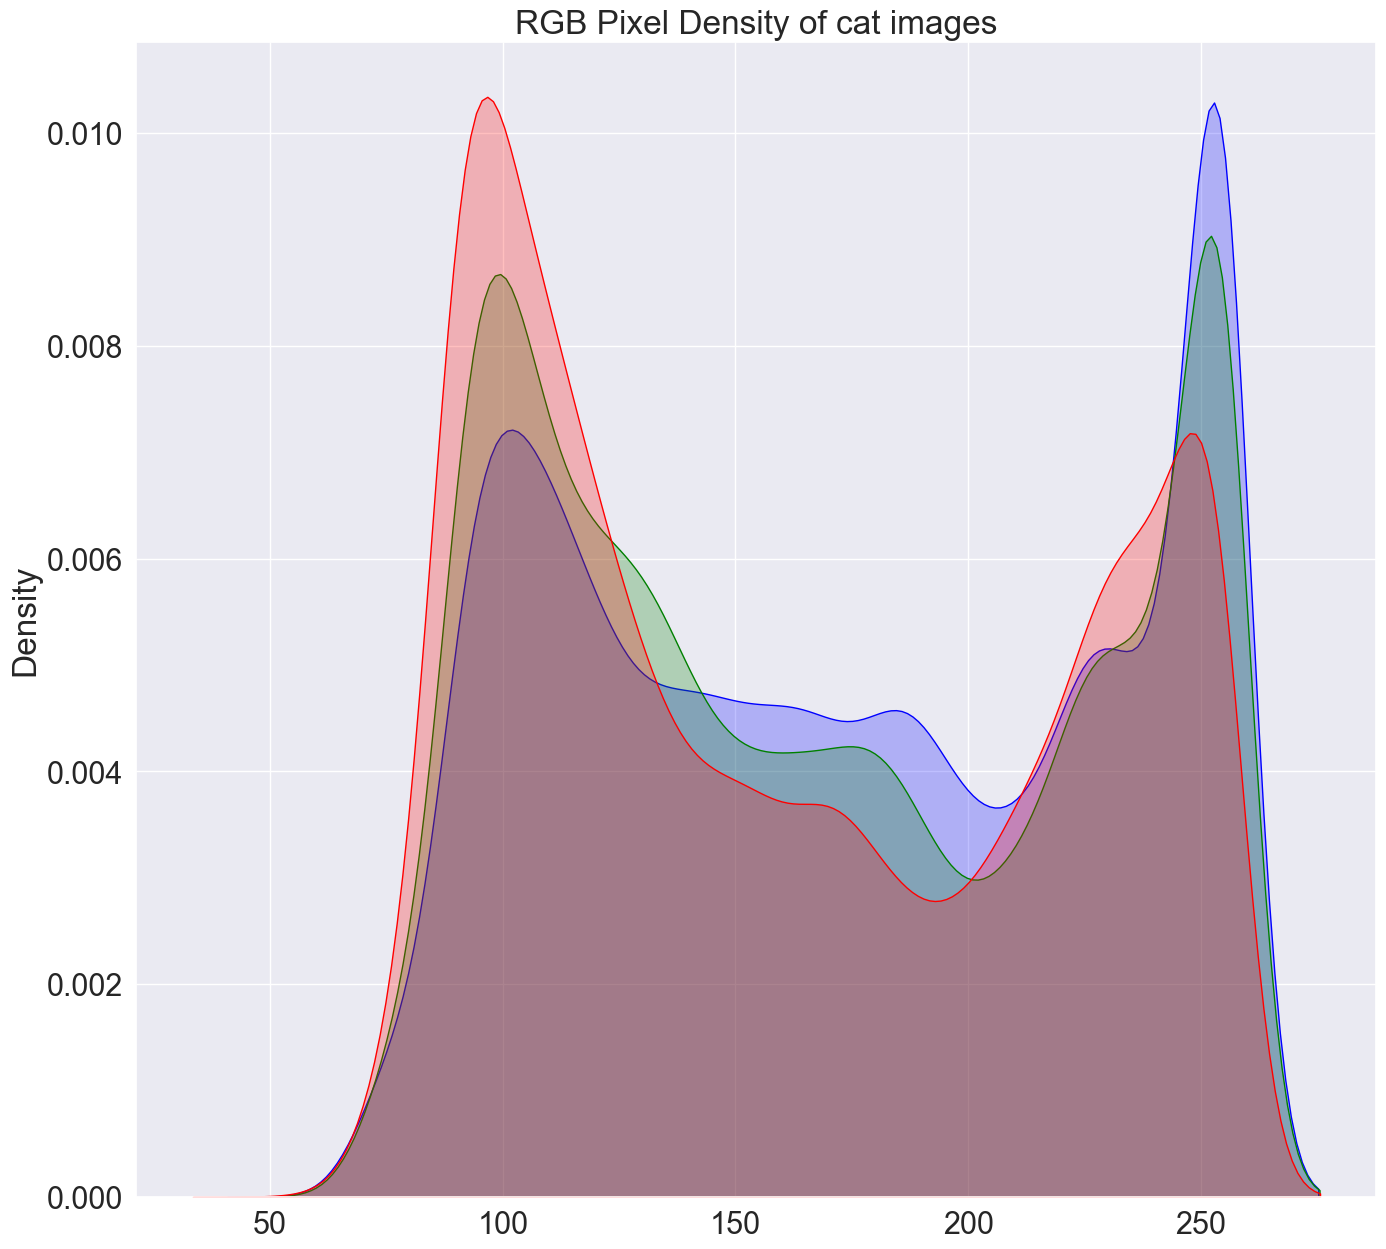

In [46]:
f,ax= plt.subplots(figsize=(16,15))
sns.set(font_scale=2.0)
sns.kdeplot(pixel_vals_b_dog, ax=ax,color='blue',fill=True).set(title='RGB Pixel Density of dog images')
sns.kdeplot(pixel_vals_g_dog, ax=ax,color='green', fill = True)
sns.kdeplot(pixel_vals_r_dog, ax=ax,color='red', fill =True)

f,ax= plt.subplots(figsize=(16,15))
sns.set(font_scale=2.0)
sns.kdeplot(pixel_vals_b_cat, ax=ax,color='blue',fill=True).set(title='RGB Pixel Density of cat images')
sns.kdeplot(pixel_vals_g_cat, ax=ax,color='green', fill = True)
sns.kdeplot(pixel_vals_r_cat, ax=ax,color='red', fill =True)
plt.show()

In [87]:
# Pixel values need to be in range 0/1
pixel_values1 = [50/255, 50/255, 50/255]
pixel_values2 = [100/255, 100/255, 100/255]
pixel_values3 = [150/255, 150/255, 150/255]

In [88]:
def plot_pixels(pixel_values):
    patch = plt.Rectangle((0, 0), 1, 1, color=pixel_values)
    fig, ax = plt.subplots()
    ax.add_patch(patch)
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

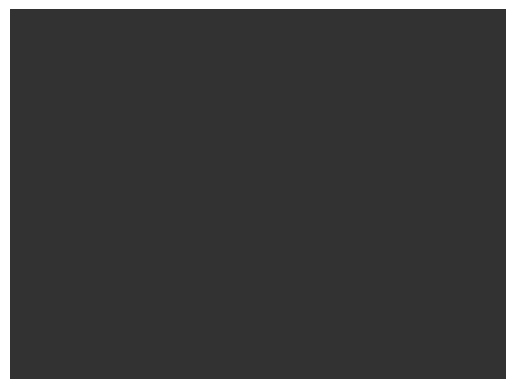

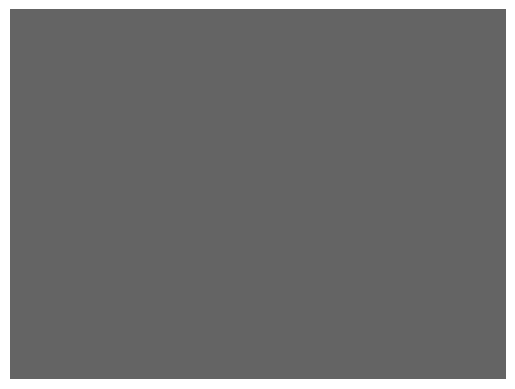

In [89]:

plot_pixels(pixel_values1), plot_pixels(pixel_values2)
plt.show()

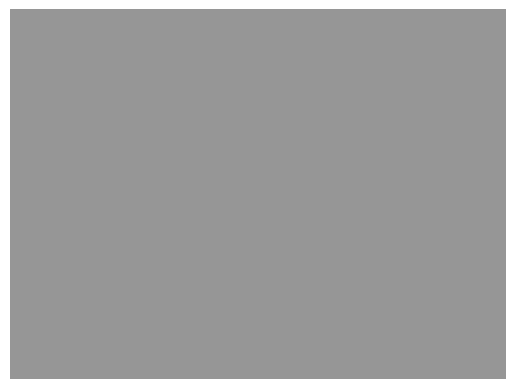

In [90]:
plot_pixels(pixel_values3)

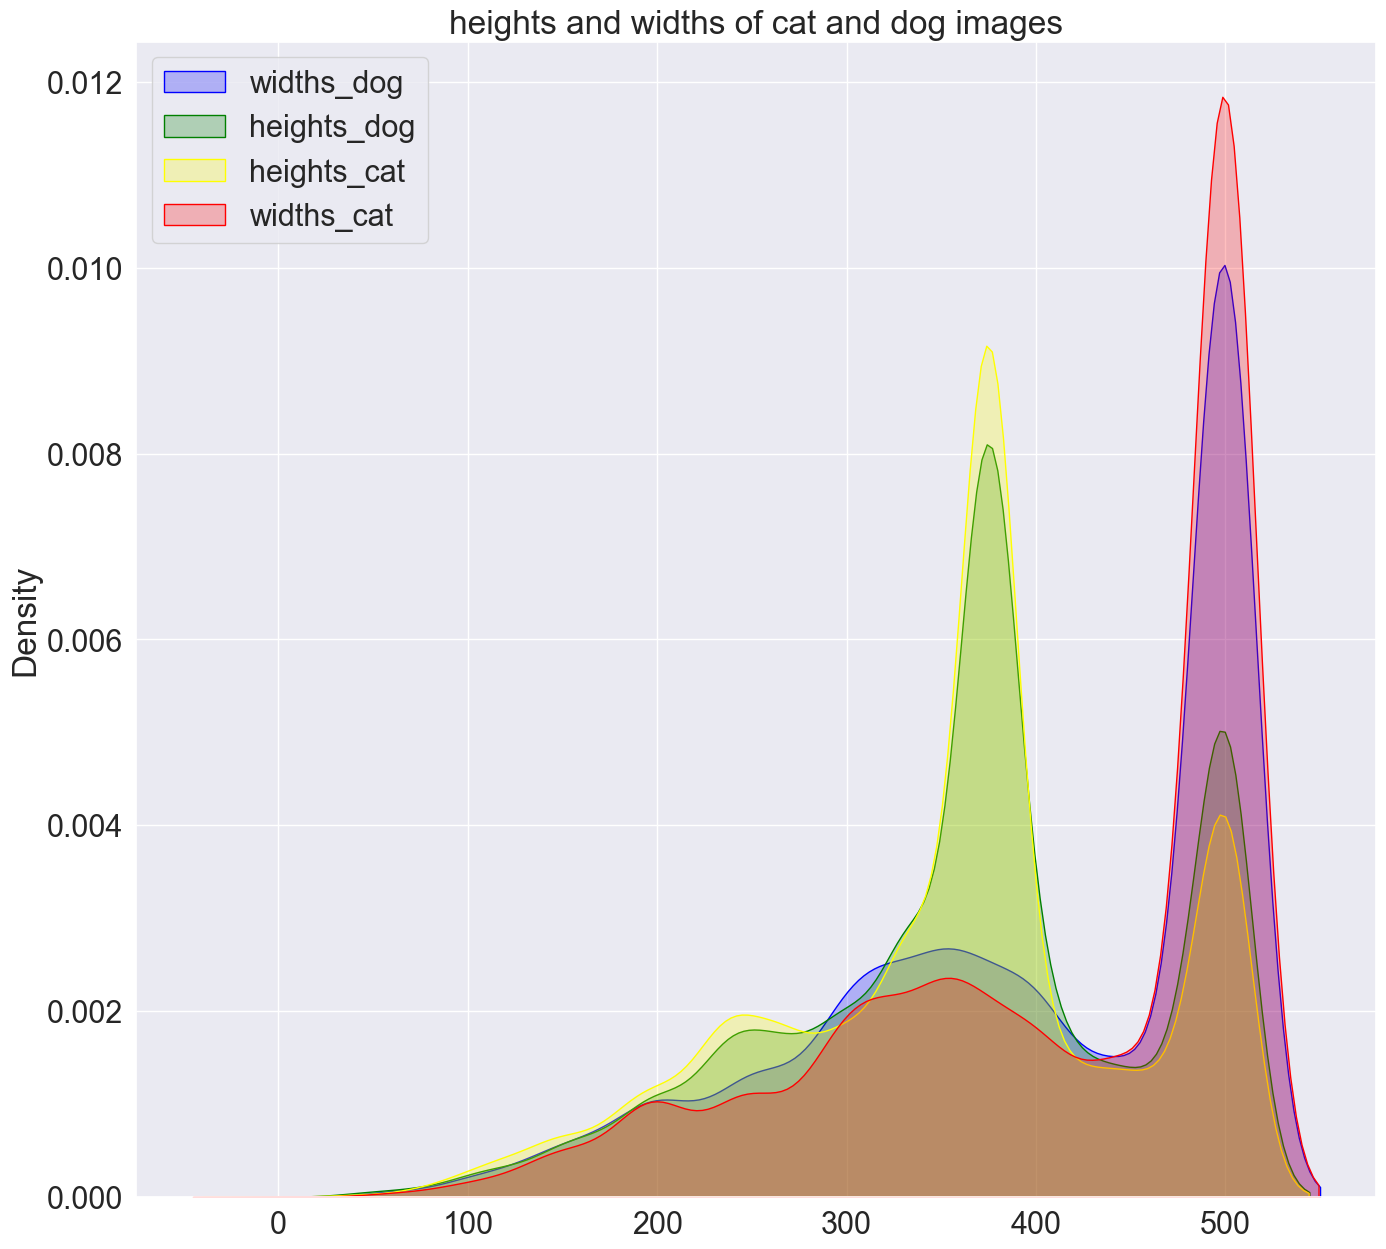

In [118]:
f,ax= plt.subplots(figsize=(16,15))
sns.kdeplot(widths_dog, ax=ax,color='blue',fill=True).set(title=
'heights and widths of cat and dog images')
sns.kdeplot(heights_dog, ax=ax,color='green', fill = True)
sns.kdeplot(heights_cat, ax=ax,color='yellow', fill = True)
sns.kdeplot(widths_cat, ax=ax,color='red', fill = True)
plt.legend(['widths_dog','heights_dog','heights_cat','widths_cat'],loc='upper left')
plt.show()

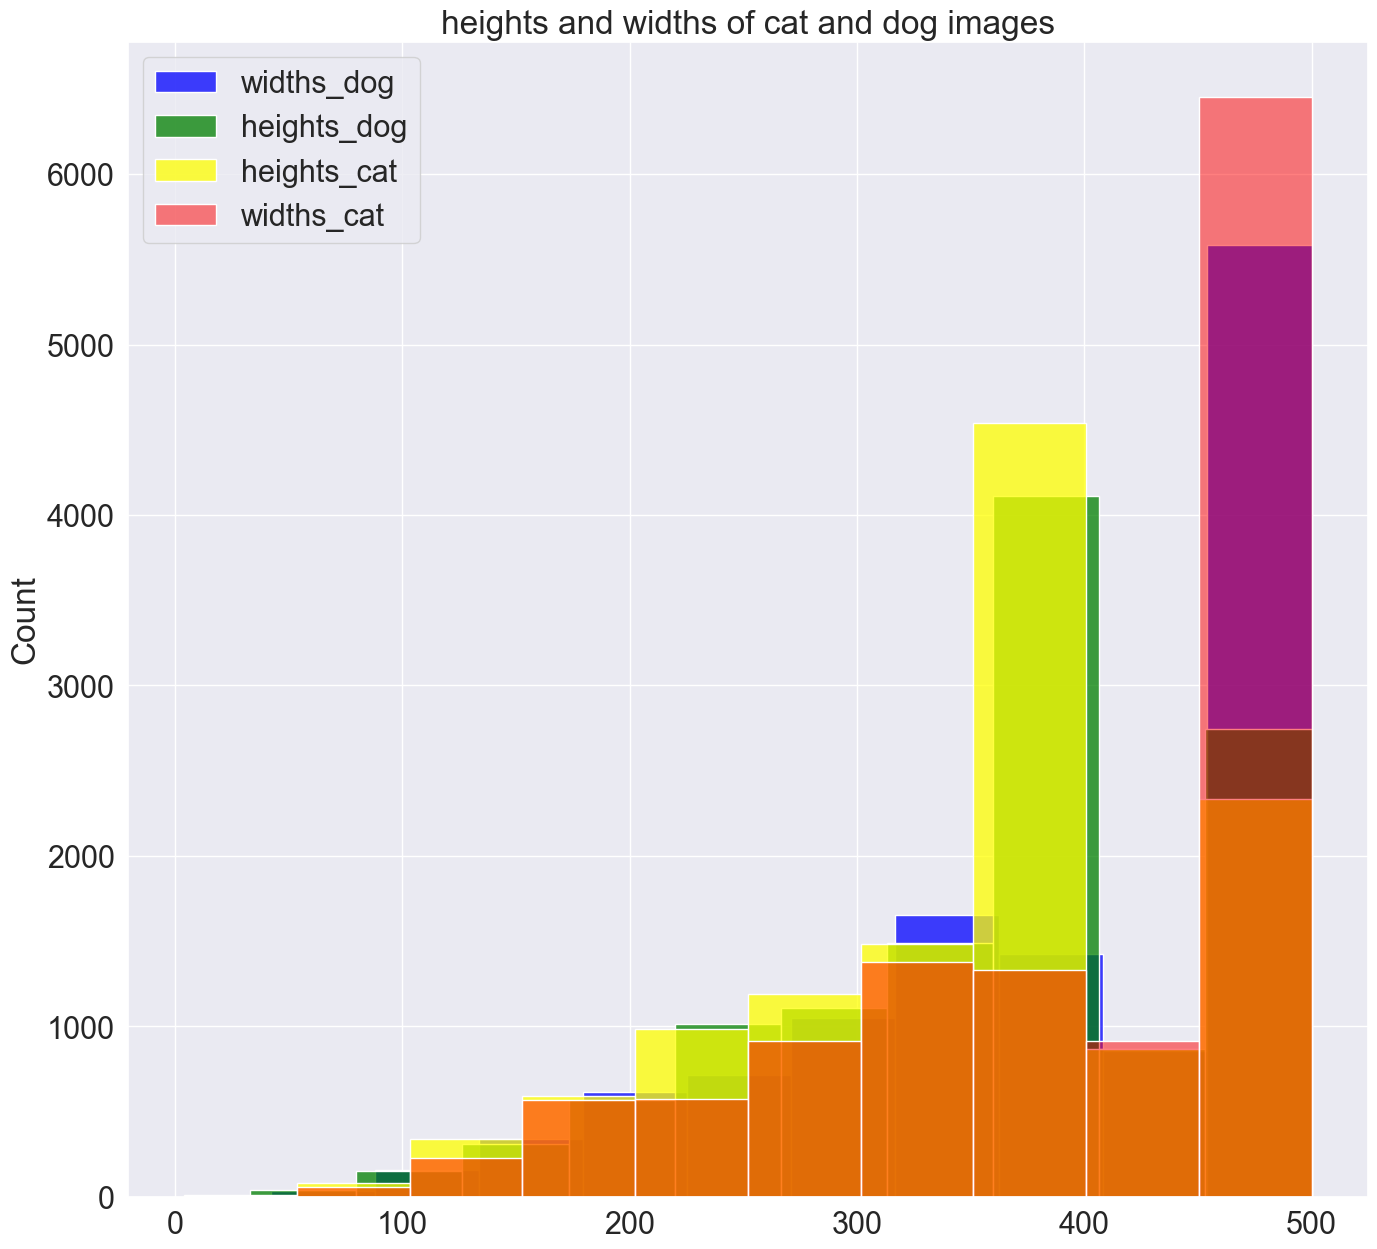

In [119]:
f,ax= plt.subplots(figsize=(16,15))
sns.histplot(widths_dog, ax=ax,color='blue',fill=True, bins =10).set(title=
'heights and widths of cat and dog images')
sns.histplot(heights_dog, ax=ax,color='green', fill = True,bins=10)
sns.histplot(heights_cat, ax=ax,color='yellow', fill = True,bins=10)
sns.histplot(widths_cat, ax=ax,color='red', fill = True,alpha= 0.5,bins=10)
plt.legend(['widths_dog','heights_dog','heights_cat','widths_cat'],loc='upper left')
plt.show()

[Text(0.5, 1.0, 'widths of dog images')]

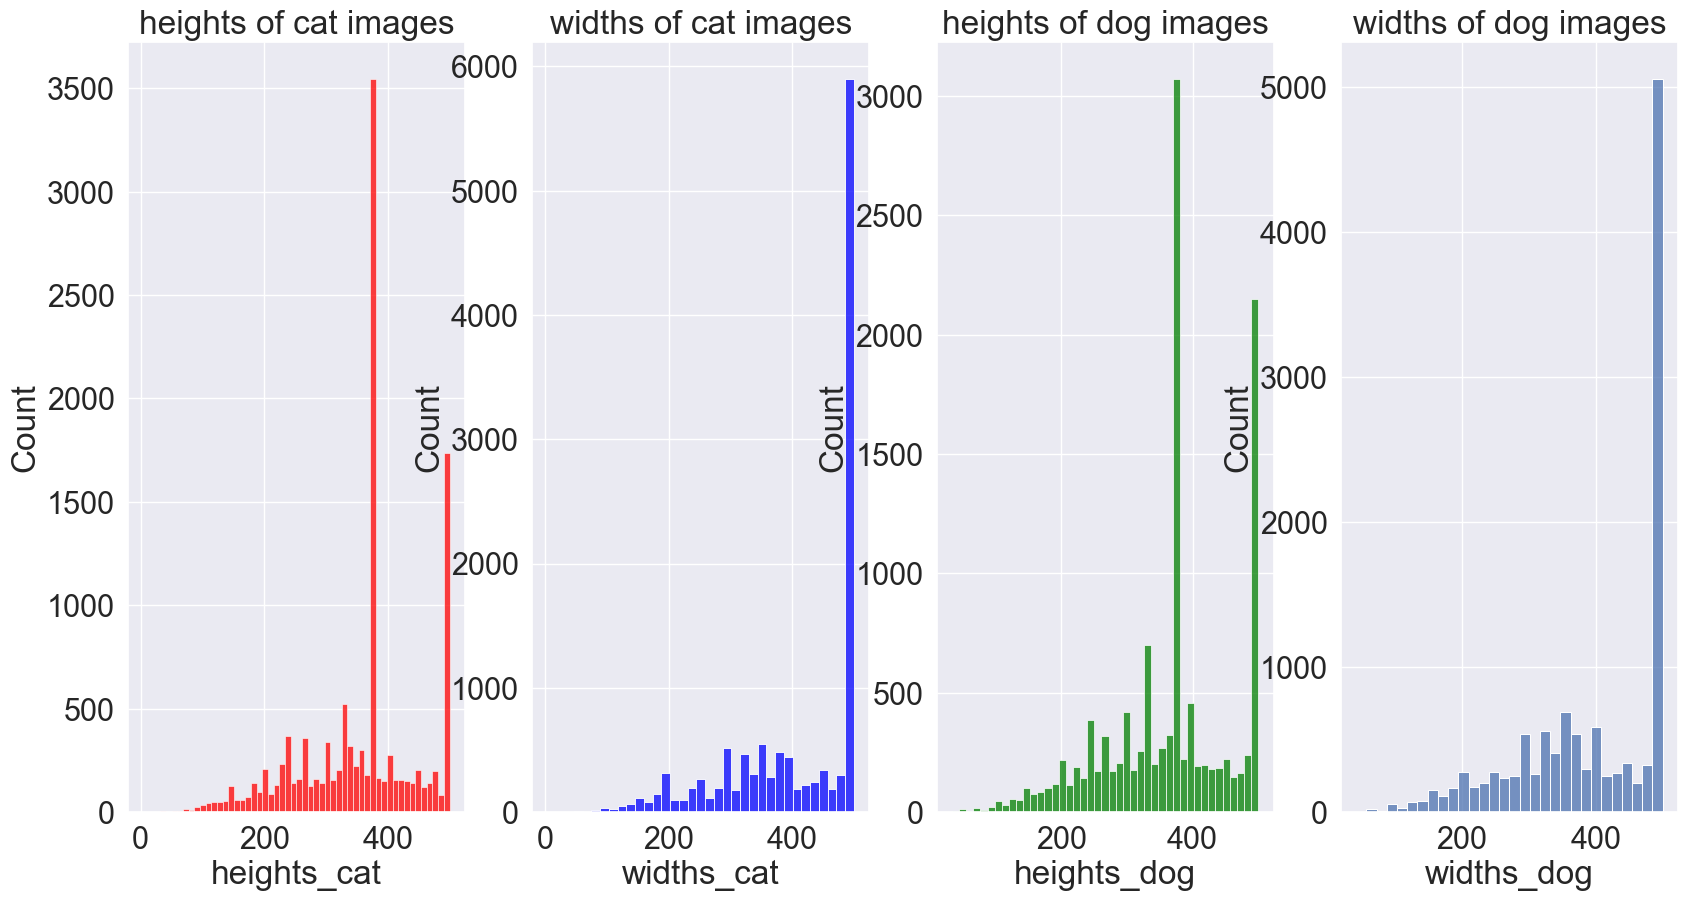

In [131]:
f,axes = plt.subplots(1, 4,figsize=(20,10))
cats_heights1 = pd.DataFrame(heights_cat,columns=['heights_cat'])
cats_width1 = pd.DataFrame(widths_cat,columns=['widths_cat'])
dogs_heights1=pd.DataFrame(heights_dog,columns=['heights_dog'])
dogs_width1=pd.DataFrame(widths_dog,columns=['widths_dog'])
sns.histplot(cats_heights1, x="heights_cat",ax=axes[0], color='red').set(title="heights of cat images")
sns.histplot(cats_width1, x="widths_cat",ax=axes[1],color='blue').set(title="widths of cat images")
sns.histplot(dogs_heights1, x="heights_dog",ax=axes[2],color='green').set(title="heights of dog images")
sns.histplot(dogs_width1, x="widths_dog",ax=axes[3]).set(title="widths of dog images")

What about the balance of samples? How many classes are  found in each data set?
Since the problem is binary, the images fall into categories of 0 or 1.

In [145]:
print(' There are:', len(xy1['status'].unique()), 'categories in the training data set','\n',
'There are:', len(xy2['status'].unique()), 'categories in the validation data set','\n',
'There are:', len(xy3['status'].unique()), 'categories in the test data set')

 There are: 2 categories in the training data set 
 There are: 2 categories in the validation data set 
 There are: 2 categories in the test data set


Not surprisingly, there are two categories in each data set.
How about the numbers of samples?


In [154]:
print('Training data:', 'images in the 0 category : ',len(xy1[xy1['status']==0]),"," 
      ,'images in the 1 category :',len(xy1[xy1['status']==1]) )
print('Validation data:', 'images in the 0 category:',len(xy2[xy2['status']==0]),"," 
      ,'images in the 1 category:',len(xy2[xy2['status']==1]) )
print('Test data:', 'images in the 0 category:',len(xy3[xy3['status']==0]),"," 
      ,'images in the 1 category:',len(xy3[xy3['status']==1]) )

Training data: images in the 0 category :  12418 , images in the 1 category : 12418
Validation data: images in the 0 category: 40 , images in the 1 category: 40
Test data: images in the 0 category: 40 , images in the 1 category: 40


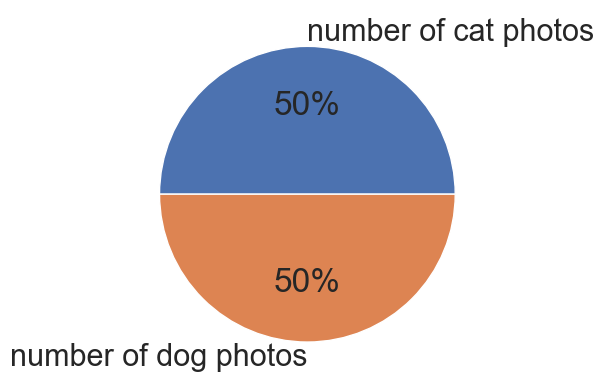

In [94]:
data=[len(heights_cat),len(heights_dog)]
keys='number of cat photos','number of dog photos'
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.show()

## Procedure


Setting the device to cuda, so the GPU can be utilized. 

In [2]:
print(torch.__version__)

2.1.0+cu121


In [3]:
device = torch.device('cuda') 

In [4]:
device

device(type='cuda')

Creating lists, one for training, validation and testing, appending relevant file names to each.

In [5]:
# Loading data
#For training

starter_path = os.path.join(os.getcwd(), 'train')
data_labels_tr = []
next_path = os.listdir(starter_path)

for i in next_path:
    impath = (os.path.join(starter_path, i))
    data_labels_tr.append(i)

#For validation
starter_path = os.path.join(os.getcwd(), 'val')
data_labels_val = []
next_path = os.listdir(starter_path)

for i in next_path:
    impath = (os.path.join(starter_path, i))
    data_labels_val.append(i)

#For testing
starter_path = os.path.join(os.getcwd(), "test")
data_labels_tst = []
next_path = os.listdir(starter_path)

for i in next_path:
    impath = (os.path.join(starter_path, i))
    data_labels_tst.append(i)

In [6]:
# A lazyish way of creating labels for a binary classification task. Put a 0 if the file contains a partial name
partial_string = 'og'
xy1=pd.DataFrame(data_labels_tr)
xy2=pd.DataFrame(data_labels_val)
xy3=pd.DataFrame(data_labels_tst)
xy1['status'] = xy1[0].str.contains(partial_string).astype(int)
xy2['status'] = xy2[0].str.contains(partial_string).astype(int)
xy3['status'] = xy3[0].str.contains(partial_string).astype(int)
xy1.columns=['id','status']
xy2.columns=['id','status']
xy3.columns=['id','status']

All data is saved to csv files, which will overwrite whatever is in the directory if it exists. 

In [7]:
# Save to csv files in the current directory
xy1.to_csv("training_labels_final.csv",index=False)
xy2.to_csv("val_labels_final.csv",index=False)
xy3.to_csv("test_labels_final.csv",index=False)

Resizing images, flipping them and turning them into tensors. 

In [8]:
## Transformer
img_transforms = v2.Compose([v2.Resize((64,64)),
                             v2.RandomHorizontalFlip(p=0.5),
                             v2.RandomPhotometricDistort(p=0.5),
                            v2.ToTensor()])

In [12]:
# Custom data loaders for training validation testing
# Loads all images and puts them into either lists or into data dictionaries. 

class Loading_training(Dataset):
    
    def __init__(self):
        """Loading various data sets 
        but only in existing train, val test folders."""
        self.selected_dataset_dir = os.path.join(os.path.join(os.getcwd(), "train"))
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(), 'training_labels_final.csv'))
        self.label_meanings = self.all_labels.columns.values.tolist()


    def __len__(self):
        """Weird"""
        return len(self.all_filenames)


    def __getitem__(self, idx):
        img_path = os.path.join(self.selected_dataset_dir, self.all_labels.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        label = self.all_labels.iloc[idx, 1]
        label = torch.tensor(label)
        image = img_transforms(image)
        return image, label


class Loading_val(Dataset):
    
    def __init__(self):
        """Trying to load jpeg transformed Dicam files."""
        self.selected_dataset_dir = os.path.join(os.getcwd(), "val")
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(), 'val_labels_final.csv'))
        self.label_meanings = self.all_labels.columns.values.tolist()


    def __len__(self):
        """Weird"""
        return len(self.all_filenames)


    def __getitem__(self, idx):
        img_path = os.path.join(self.selected_dataset_dir, self.all_labels.iloc[idx, 0])
        image =  Image.open(img_path).convert("RGB")
        label = self.all_labels.iloc[idx, 1]
        label = torch.tensor(label)
        image = img_transforms(image)
        return image, label

    
class Loading_test(Dataset):

    def __init__(self):
        """Loading test images."""
        self.selected_dataset_dir = os.path.join(os.getcwd(), "test")
        self.all_filenames = os.listdir(self.selected_dataset_dir)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(),'test_labels_final.csv'))
        self.label_meanings = self.all_labels.columns.values.tolist()


    def __len__(self):
        """Weird"""
        return len(self.all_filenames)


    def __getitem__(self, idx):
        """The IDX function is built in to Pytorch. Pretty Cool I think.
        And then I use the above image transforms function"""
        selected_filename = self.all_filenames[idx]
        #print(selected_filename)
        imagepil = Image.open(os.path.join(self.selected_dataset_dir, selected_filename)).convert("RGB")
        image = img_transforms(imagepil)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(), 'test_labels_final.csv'))
        label= self.all_labels['status'][idx]


        sample = {'data':image, 
                  'label':label,
                  'img_idx':idx, 'sample_name':selected_filename}
        return(sample)

In [9]:
class Modelo(nn.Module):
    
    def __init__(self):
        super(Modelo, self).__init__()
        self.main = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=1),
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1),
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1),
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), padding=1),
            #torch.nn.Dropout2d(p=0.2),
            torch.nn.Conv2d(in_channels=64, out_channels=32, kernel_size=(3, 3), padding=1,bias=False),
            nn.BatchNorm2d(32, affine=False),
            torch.nn.MaxPool2d(2, 2),
            torch.nn.LeakyReLU(inplace=True,negative_slope=0.02))
        self.main1 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1),
        torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1),
        torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), padding=1),
        torch.nn.Dropout2d(p=0.2),
        torch.nn.Conv2d(in_channels=32, out_channels=16, kernel_size=(3, 3), padding=1),
        torch.nn.LeakyReLU(inplace=True,negative_slope=0.02))
        self.main2 = torch.nn.Sequential(
        torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1),
        torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1),
        torch.nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), padding=1),
        torch.nn.Conv2d(in_channels=16, out_channels=8, kernel_size=(3, 3), padding=1),
        #torch.nn.MaxPool2d(2, 2),
        torch.nn.LeakyReLU(inplace=True,negative_slope=0.02))
        self.main3 = torch.nn.Sequential(
        torch.nn.Dropout2d(p=0.2),
        torch.nn.Conv2d(in_channels=8, out_channels=2, kernel_size=(3, 3), padding=1),
        torch.nn.MaxPool2d(2, 2),
        torch.nn.LeakyReLU(inplace=True,negative_slope=0.1))
        self.fc4 = nn.Linear(in_features=512,out_features=256)
        self.fc5 = nn.Linear(in_features=256,out_features=128)
        self.fc6 = nn.Linear(in_features=128,out_features=1)

    def forward(self, x):
        x = self.main(x)
        x = self.main1(x)
        x = self.main2(x)
        x = self.main3(x)
        x = torch.flatten(x,start_dim=1,end_dim=-1)
        #x = self.fc1(x)
        #x = self.fc2(x)
        #x = self.fc3(x)
        x = self.fc4(x)
        x = self.fc5(x)
        x = self.fc6(x)
        return x


model = Modelo().to(device)


import torchvision
from torchview import draw_graph



In [ ]:

training1=Loading_training()
val1=Loading_val()
test1= Loading_test()


train_dataloader = DataLoader(training1, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val1, batch_size=10, shuffle=True)

In [10]:
loss_fn_=nn.BCEWithLogitsLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.0000050)

The below code will run training and test the data on validation data,
then it will save the best X models based on accuracy to a folder called checkpoint.


In [17]:
def update_model(engine, batch):
    model.train()
    data,label = batch
    optimizer.zero_grad()
    data=data.to(device)
    label=label.to(device)
    #print(label.get_device())
    #print(data.get_device())
    outputs,_=(model(data),label)
    outputs=outputs.squeeze()
    loss = loss_fn_(outputs, label.float())
    loss.backward()
    optimizer.step()
    return loss.item()

trainer = Engine(update_model)


val_metrics = {
    "accuracy": Accuracy(),
    "loss": Loss(loss_fn_)
}


def validation_step(engine, batch):
    model.eval()
    with torch.no_grad():
        x, y = batch
        x=x.to(device)
        y=y.to(device)
        outputs,_=(model(x),y)
        outputs = outputs.squeeze()
        outputs=torch.sigmoid(outputs)
        outputs=outputs.round()
        y=y.cpu().detach()

    return outputs, y.float()
    
    
evaluator = Engine(validation_step)


from ignite.metrics import Accuracy
from ignite.metrics import Precision, Recall

precision = Precision()


Accuracy().attach(evaluator, "accuracy")
Precision().attach(evaluator,'precision')
Recall(average='weighted').attach(evaluator,'recall')


    

@trainer.on(Events.ITERATION_COMPLETED(every=100))
def log_training(engine):
    batch_loss = engine.state.output
    lr = optimizer.param_groups[0]['lr']
    e = engine.state.epoch
    n = engine.state.max_epochs
    i = engine.state.iteration
    print("Epoch {}/{} : {} - batch loss: {}, lr: {}".format(e, n, i, batch_loss, lr))
    
    
    
    
    
from ignite.handlers import Timer, BasicTimeProfiler, HandlersTimeProfiler    
from ignite.engine import Events

validate_every = 5


@trainer.on(Events.EPOCH_COMPLETED(every=validate_every))
def run_validation():
    evaluator.run(val_dataloader)
    
@trainer.on(Events.EPOCH_COMPLETED(every=validate_every))
def log_validation():
    ugh=[]
    metrics = evaluator.state.metrics
    print(f"Epoch: {trainer.state.epoch},  Accuracy: {metrics['accuracy']},  Precision: {metrics['precision']}, recall: {metrics['recall']}")


def score_function(engine):
    return engine.state.metrics["accuracy"]


model_checkpoint = ModelCheckpoint(
    "checkpoint",
    n_saved=25,
    filename_prefix="best",
    score_function=score_function,
    score_name="accuracy",
    global_step_transform=global_step_from_engine(trainer),
)
  
evaluator.add_event_handler(Events.COMPLETED, model_checkpoint, {"model": model})

tb_logger = TensorboardLogger(log_dir="tb-logger")

tb_logger.attach_output_handler(
    trainer,
    event_name=Events.ITERATION_COMPLETED(every=100),
    tag="training",
    output_transform=lambda loss: {"batch_loss": loss},
)

for tag, evaluator in [("training", trainer), ("validation", evaluator)]:
    tb_logger.attach_output_handler(
        evaluator,
        event_name=Events.EPOCH_COMPLETED,
        tag=tag,
        metric_names="all",
        global_step_transform=global_step_from_engine(trainer),
    )

trainer.run(train_dataloader, max_epochs=200)

Epoch 1/200 : 100 - batch loss: 0.6717314720153809, lr: 5e-06
Epoch 1/200 : 200 - batch loss: 0.62602299451828, lr: 5e-06
Epoch 1/200 : 300 - batch loss: 0.5983356833457947, lr: 5e-06
Epoch 2/200 : 400 - batch loss: 0.620399534702301, lr: 5e-06
Epoch 2/200 : 500 - batch loss: 0.6466283798217773, lr: 5e-06
Epoch 2/200 : 600 - batch loss: 0.6703633069992065, lr: 5e-06
Epoch 2/200 : 700 - batch loss: 0.6332987546920776, lr: 5e-06
Epoch 3/200 : 800 - batch loss: 0.5965307950973511, lr: 5e-06
Epoch 3/200 : 900 - batch loss: 0.5554847121238708, lr: 5e-06
Epoch 3/200 : 1000 - batch loss: 0.6473831534385681, lr: 5e-06
Epoch 3/200 : 1100 - batch loss: 0.6285393238067627, lr: 5e-06
Epoch 4/200 : 1200 - batch loss: 0.546758234500885, lr: 5e-06
Epoch 4/200 : 1300 - batch loss: 0.6762315034866333, lr: 5e-06
Epoch 4/200 : 1400 - batch loss: 0.544600784778595, lr: 5e-06
Epoch 4/200 : 1500 - batch loss: 0.6425125598907471, lr: 5e-06
Epoch 5/200 : 1600 - batch loss: 0.6203905344009399, lr: 5e-06
Epoch 

State:
	iteration: 77800
	epoch: 200
	epoch_length: 389
	max_epochs: 200
	output: 0.21232636272907257
	batch: <class 'list'>
	metrics: <class 'dict'>
	dataloader: <class 'torch.utils.data.dataloader.DataLoader'>
	seed: <class 'NoneType'>
	times: <class 'dict'>

In [11]:
from torcheval.metrics.functional import binary_accuracy

from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional.aggregation.auc import auc
from torcheval.metrics.functional import binary_precision
from torcheval.metrics.functional import binary_accuracy
from torcheval.metrics.functional import binary_f1_score
from sklearn.metrics import roc_curve

In [23]:
test_dataloader = DataLoader(test1, batch_size=80, shuffle=True)

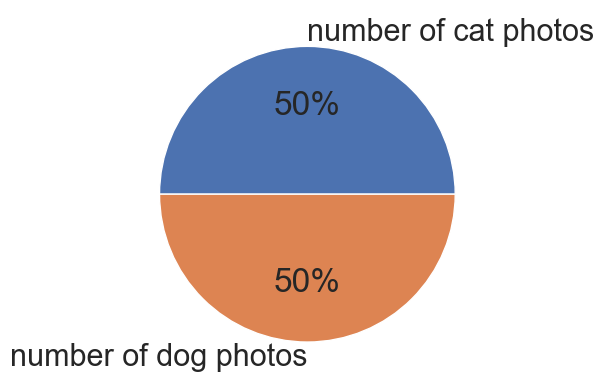

In [ ]:
data=[len(heights_cat),len(heights_dog)]
keys='number of cat photos','number of dog photos'
plt.pie(data, labels=keys,autopct='%.0f%%')
plt.show()

In [24]:
new_dir = os.path.join(os.getcwd(),'models_1')


In [35]:
torch.manual_seed(0)
accuracy10=[]
roc_things=[]

from torcheval.metrics.functional import binary_accuracy

from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional.aggregation.auc import auc
from torcheval.metrics.functional import binary_precision
from torcheval.metrics.functional import binary_accuracy
from torcheval.metrics.functional import binary_f1_score
from sklearn.metrics import roc_curve
new_dir = os.path.join(os.getcwd(),'models_1')
for j in os.listdir(new_dir):
    PATH=os.path.join(new_dir,j)
    model.load_state_dict(torch.load(PATH))
    for i, batch in enumerate(test_dataloader):
        model.eval()
        data,label = batch['data'].float(),batch['label']
        data = data.to(device)
        label = label.to(device)
        y_logits,label = (model(data),label)
        test_pred = y_logits.squeeze(-1)
        test_pred = torch.sigmoid(test_pred)
        test_pred = test_pred.cpu().detach()
        test_pred = test_pred.round()
        test_pred1 = test_pred.cpu().detach()
        label = label.cpu().detach()
        fpr, tpr, threshold = roc_curve(label.float(), test_pred1)
        
        bina_acc = binary_accuracy(test_pred, label, threshold=0.7)
        bin_acc = bina_acc.detach().numpy()
        
        f1_score1 = binary_f1_score(test_pred, label, threshold=0.61)
        f1_score = f1_score1.detach().numpy()
        
        bin_rec1 = binary_recall(test_pred, label, threshold=0.61)
        bin_rec = bin_rec1.detach().numpy()
        
        bin_prec1 = binary_precision(test_pred, label, threshold=0.61)
        bin_prec = bin_prec1.detach().numpy()
        
        accuracy10.append([bin_acc, f1_score,bin_rec,
                           bin_prec, j, test_pred1.numpy(),
                           label.numpy()])
        roc_things.append([fpr, tpr, threshold])
        


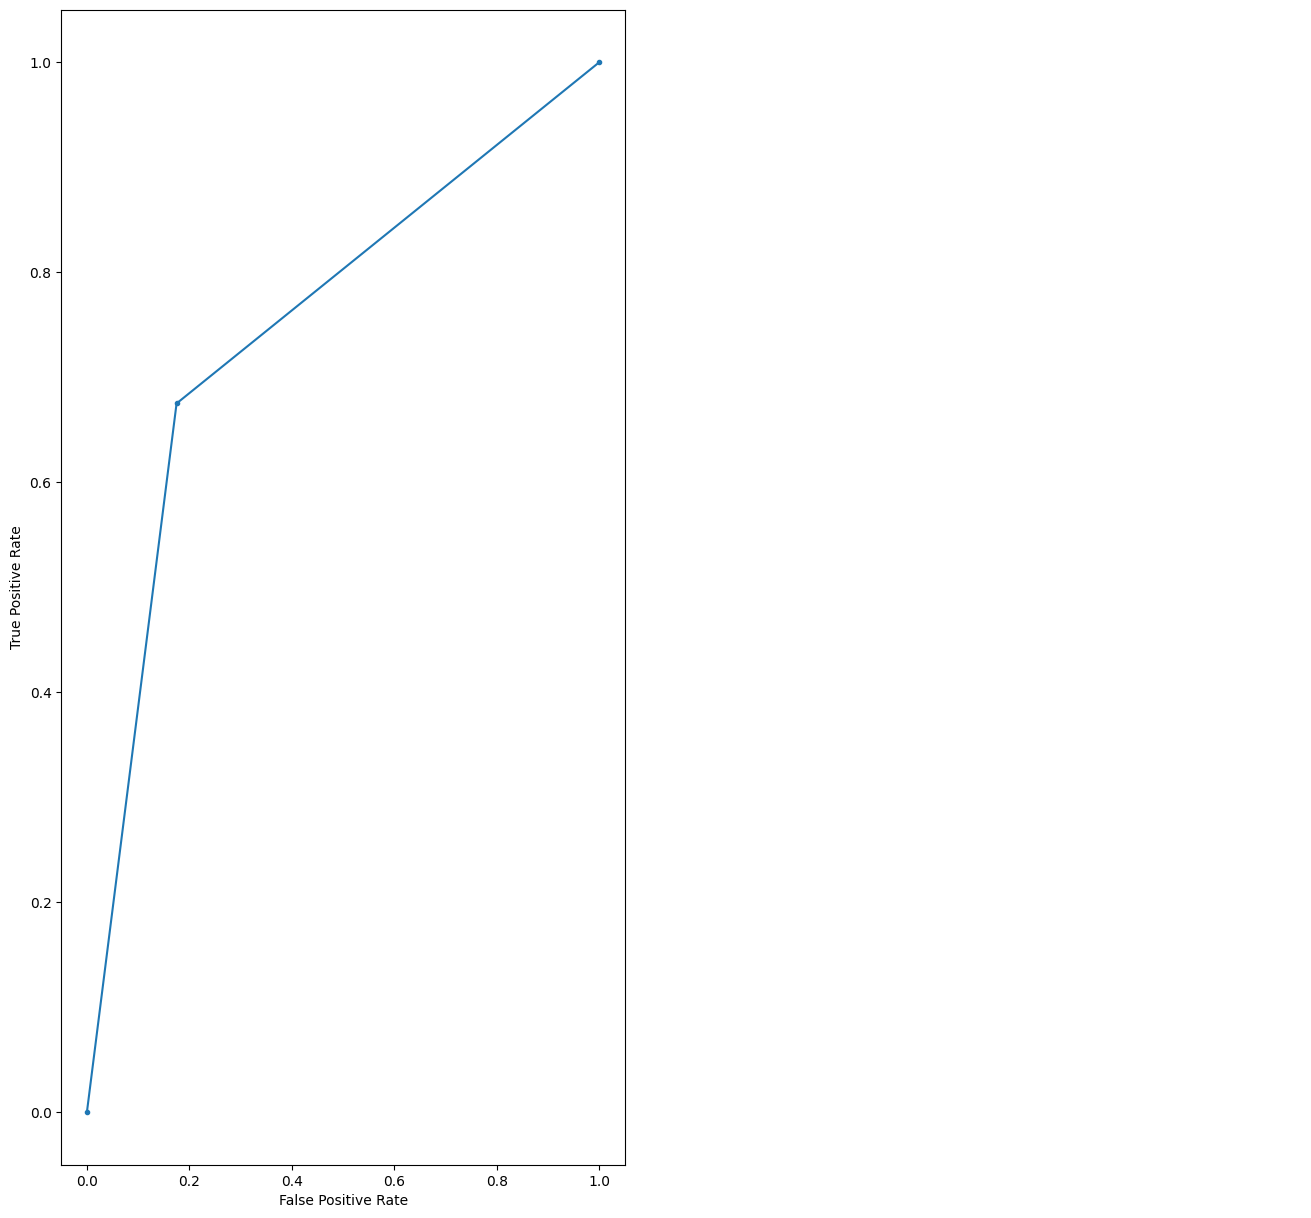

In [33]:
from matplotlib import pyplot as plt
f,ax= plt.subplots(figsize=(16,15))
plt.subplot(1,2,1)
plt.plot(fpr,tpr,marker='.')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate' )
ax.set_axis_off()

Plot more stuff from each model. Maybe some visualizations of the results here.

In [36]:
ahh=pd.DataFrame(accuracy10,columns=['Accuracy','F1', 'binary_recall', 
                                     'binary_precision', 'model_info',
                                     'y_pred','y_true'])
ahh

,Accuracy,F1,binary_recall,binary_precision,model_info,y_pred,y_true
0,0.7875,0.81318676,0.925,0.7254902,best_model_100_accuracy=0.7375.pt,"[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, ...","[0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, ..."
1,0.775,0.78048784,0.8,0.7619048,best_model_10_accuracy=0.6875.pt,"[1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, ..."
2,0.8125,0.81481487,0.825,0.80487806,best_model_110_accuracy=0.8000.pt,"[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...","[1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, ..."
3,0.7875,0.74626863,0.625,0.9259259,best_model_115_accuracy=0.7500.pt,"[0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...","[0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, ..."
4,0.8125,0.8101266,0.8,0.82051283,best_model_120_accuracy=0.7500.pt,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, ...","[1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, ..."
5,0.7625,0.7246377,0.625,0.86206895,best_model_125_accuracy=0.7750.pt,"[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, ...","[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, ..."
6,0.7875,0.7733334,0.725,0.82857144,best_model_130_accuracy=0.8000.pt,"[0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...","[0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, ..."
7,0.775,0.78048784,0.8,0.7619048,best_model_140_accuracy=0.7500.pt,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, ...","[1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ..."
8,0.775,0.79069775,0.85,0.73913044,best_model_145_accuracy=0.8000.pt,"[1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ..."
9,0.7875,0.8,0.85,0.75555557,best_model_150_accuracy=0.7750.pt,"[0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, ..."


In [172]:
m=range(len(ahh))

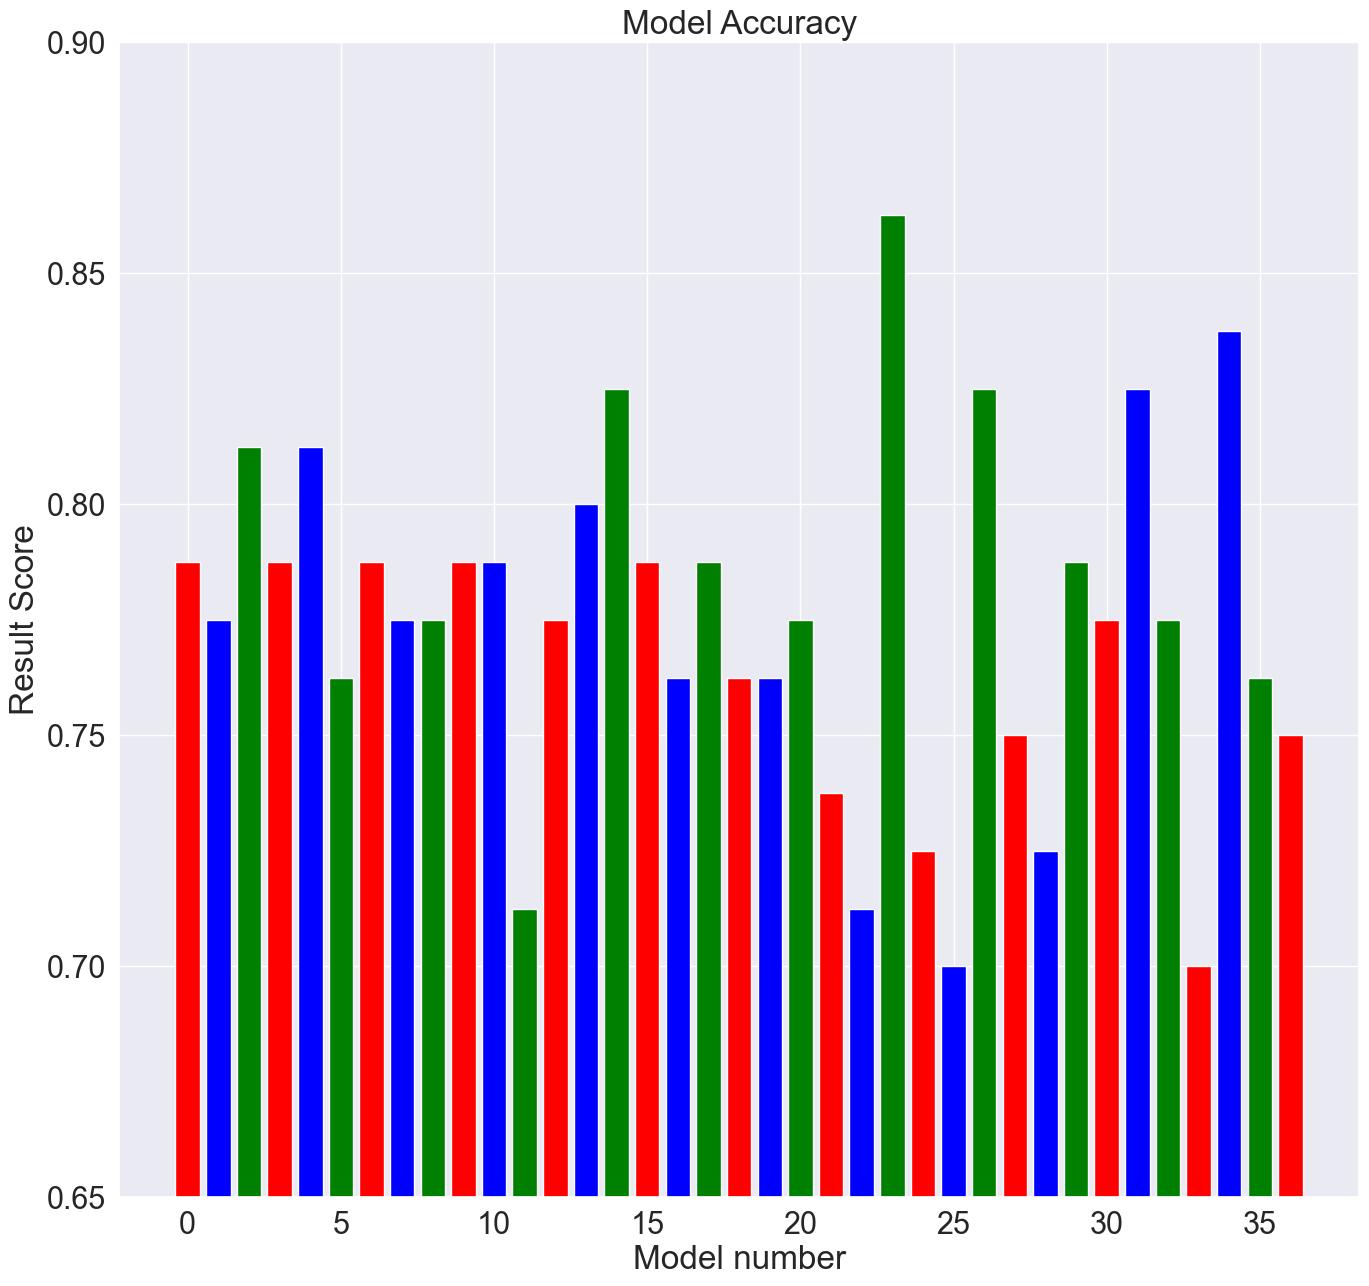

In [218]:
fig, ax = plt.subplots(figsize=(16,15))
colors=['red', 'blue','green']
plt.bar(m,height=ahh['Accuracy'], color = colors)
plt.ylim(0.65, 0.9)
ax.set_ylabel('Result Score')
ax.set_xlabel('Model number')
ax.set_title('Model Accuracy')
plt.show()

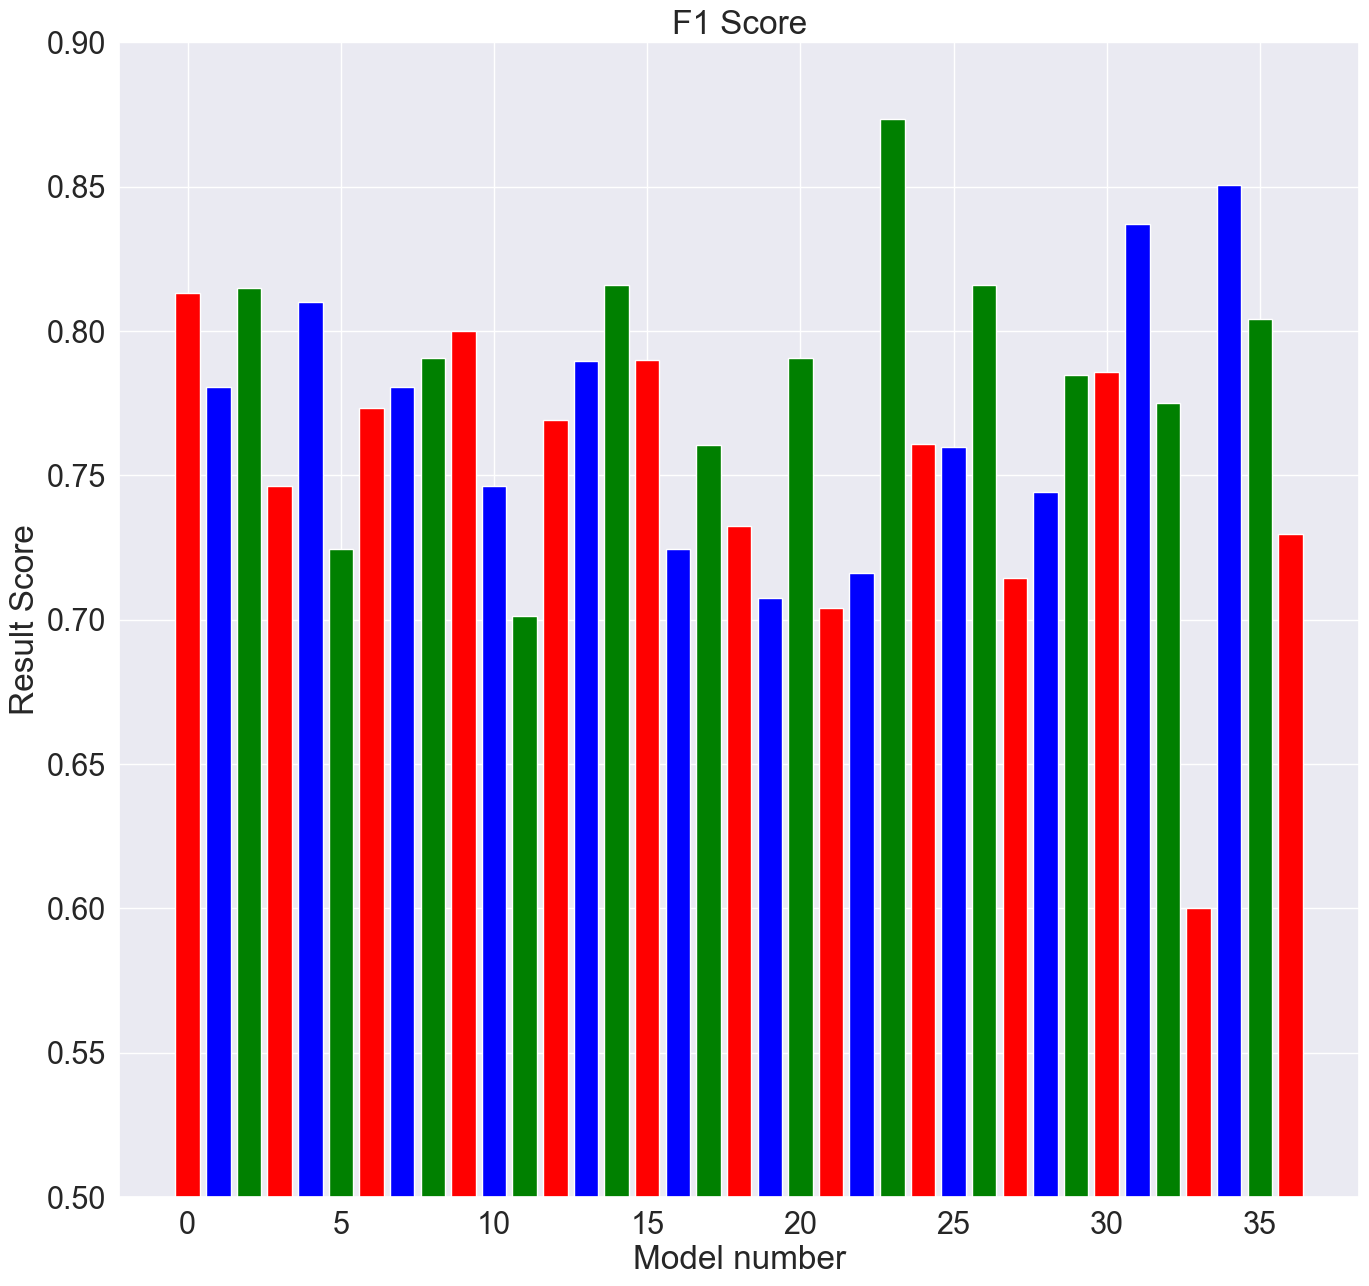

In [217]:
fig, ax = plt.subplots(figsize=(16,15))
colors=['red', 'blue','green']
plt.bar(m,height=ahh['F1'], color = colors )
plt.ylim(0.50, 0.9)
ax.set_ylabel('Result Score')
ax.set_xlabel('Model number')
ax.set_title('F1 Score')
plt.show()

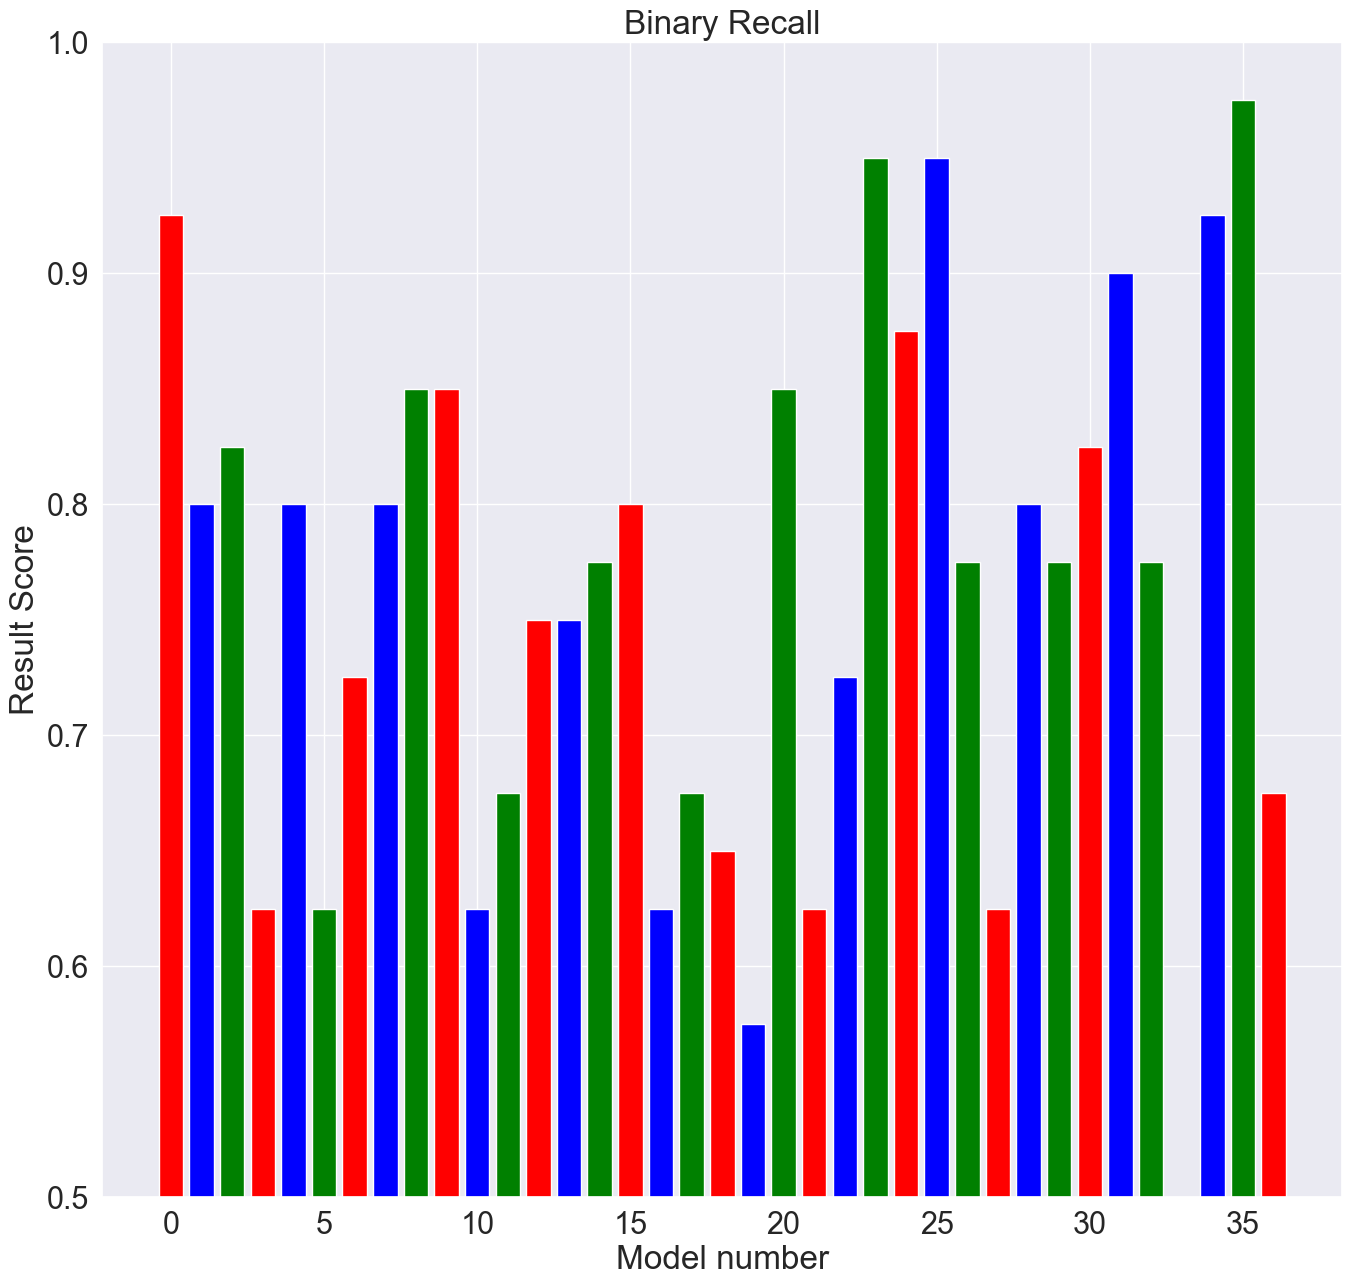

In [221]:
fig, ax = plt.subplots(figsize=(16,15))
colors=['red', 'blue','green']
plt.bar(m,height=ahh['binary_recall'], color = colors )
plt.ylim(0.50, 1.0)
ax.set_ylabel('Result Score')
ax.set_xlabel('Model number')
ax.set_title('Binary Recall')
plt.show()

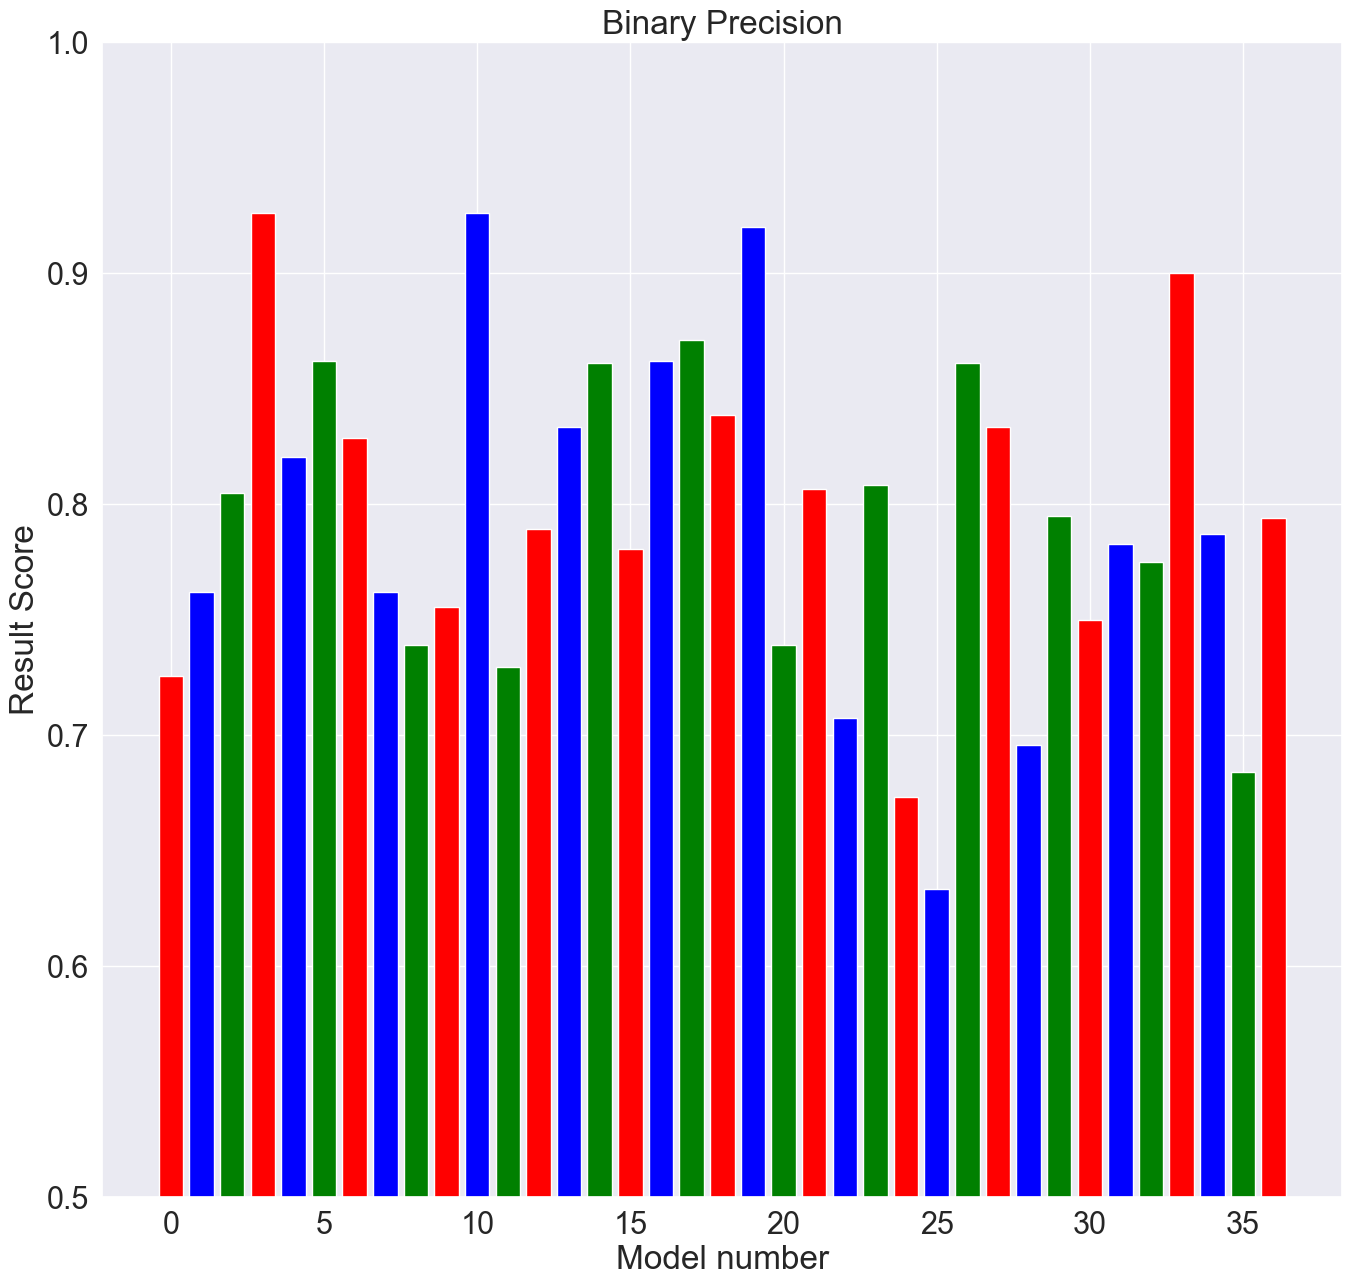

In [224]:
fig, ax = plt.subplots(figsize=(16,15))
colors=['red', 'blue','green']
plt.bar(m,height=ahh['binary_precision'], color = colors )
plt.ylim(0.50, 1.0)
ax.set_ylabel('Result Score')
ax.set_xlabel('Model number')
ax.set_title('Binary Precision')
plt.show()

In [232]:
ahh.to_csv('model_results_training.csv',index=False)

In [230]:
roc_things = pd.DataFrame(roc_things)

In [231]:
roc_things.to_csv('roc_results_for_training_data', index = False )

# Okay so these models do pretty well actually. I am quite excited about that.


And now I am going to just get random data and test to see how these models do. 


https://www.kaggle.com/datasets/samuelcortinhas/cats-and-dogs-image-classification


In [68]:
imagehash.average_hash(Image.open("C:\\Users\\amcfa\\Desktop\\Pytorch_model_project_\\completely_new_images_sources_from_Kaggle\\test\\cat_3.jpg"))

array([[ True, False, False, False, False, False, False, False],
       [False, False, False, False, False, False, False, False],
       [False, False, False,  True,  True, False, False, False],
       [False, False, False,  True,  True, False, False, False],
       [False, False, False,  True,  True, False, False, False],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True]])

In [12]:
#The below chunks make little data frames of all of the files we just split up. 
#For testing

starter_path=os.path.join(os.getcwd(),'completely_new_images_sources_from_Kaggle\\test')
data_labels_tst=[]
next_path= os.listdir(starter_path)
#after_that = os.path.join(starter_path,next_path[0])
#now_test= os.listdir(after_that)
for i in next_path:
    impath=(os.path.join(starter_path,i))
    data_labels_tst.append(i)

In [13]:
partial_string = 'og'

xy4=pd.DataFrame(data_labels_tst)
xy4['status'] = xy4[0].str.contains(partial_string).astype(int)
xy4.columns=['id','status']
xy4.to_csv("test_labels_final_1.csv",index=False)

In [14]:
import torch
from torch.utils.data import Dataset

from torchvision.transforms import ToTensor

import os
import pandas as pd
from torchvision.io import read_image
import pandas as pd
import numpy as np





class Loading_test1(Dataset):
    
    def __init__(self):
        """Trying to load jpeg transformed Dicam files.
        """
        #Define dataset
        #overall_dataset_dir = control_dir
        
        self.selected_dataset_dir = os.path.join(os.getcwd(),"\\completely_new_images_sources_from_Kaggle\\test")
        self.all_filenames = os.listdir(os.getcwd()+"\\completely_new_images_sources_from_Kaggle\\test")
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(),'test_labels_final_1.csv'))
        self.label_meanings = self.all_labels.columns.values.tolist()
        
    def __len__(self):
        """
        Weird"""
        return len(self.all_filenames)
        
    def __getitem__(self, idx):
        """The IDX function is built in to Pytorch. Pretty Cool I think.
        And then I use the above image transforms function"""
        selected_filename = self.all_filenames[idx]
        #print(selected_filename)
        imagepil = Image.open(os.path.join(os.getcwd()+"\\completely_new_images_sources_from_Kaggle\\test",selected_filename)).convert("RGB")
        
        image = img_transforms(imagepil)
        
        #image=F.normalize(image)
        self.all_labels = pd.read_csv(os.path.join(os.getcwd(),'test_labels_final_1.csv'))
        label= self.all_labels['status'][idx]
       
        
        sample = {'data':image, #preprocessed image, for input into NN
                  'label':label,
                  'img_idx':idx, 'sample_name':selected_filename}
        return(sample)

In [15]:
test2= Loading_test1()

In [16]:
batch_size =556
test_dataloader2 = DataLoader(test2, batch_size=batch_size, shuffle=True)


In [17]:

from torcheval.metrics.functional import binary_accuracy

from torcheval.metrics.functional.classification import binary_recall
from torcheval.metrics.functional.aggregation.auc import auc
from torcheval.metrics.functional import binary_precision
from torcheval.metrics.functional import binary_accuracy
from torcheval.metrics.functional import binary_f1_score
from sklearn.metrics import roc_curve

accuracy11=[]
roc_things1=[]
new_dir = os.path.join(os.getcwd(),'models_1')
for j in os.listdir(new_dir):
    PATH=os.path.join(new_dir,j)
    model.load_state_dict(torch.load(PATH))
    for i, batch in enumerate(test_dataloader2):
        model.eval()
        data,label = batch['data'].float(),batch['label']
        data = data.to(device)
        label = label.to(device)
        y_logits,label = (model(data),label)
        test_pred = y_logits.squeeze(-1)
        test_pred = torch.sigmoid(test_pred)
        test_pred = test_pred.cpu().detach()
        test_pred = test_pred.round()
        test_pred1 = test_pred.cpu().detach()
        label = label.cpu().detach()
        fpr, tpr, threshold = roc_curve(label.float(), test_pred1)
        
        bina_acc = binary_accuracy(test_pred, label, threshold=0.7)
        bin_acc = bina_acc.detach().numpy()
        
        f1_score1 = binary_f1_score(test_pred, label, threshold=0.61)
        f1_score = f1_score1.detach().numpy()
        
        bin_rec1 = binary_recall(test_pred, label, threshold=0.61)
        bin_rec = bin_rec1.detach().numpy()
        
        bin_prec1 = binary_precision(test_pred, label, threshold=0.61)
        bin_prec = bin_prec1.detach().numpy()
        
        accuracy11.append([bin_acc, f1_score,bin_rec,
                           bin_prec, j, test_pred1.numpy(),
                           label.numpy()])
        roc_things1.append([fpr, tpr, threshold])


In [18]:
ahh1=pd.DataFrame(accuracy11,columns = ['Accuracy','F1', 'binary_recall', 
                                     'binary_precision', 'model_info',
                                     'y_pred','y_true'])
ahh1

,Accuracy,F1,binary_recall,binary_precision,model_info,y_pred,y_true
0,0.6530612,0.7237814,0.91078067,0.6004902,best_model_100_accuracy=0.7375.pt,"[1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, ...","[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, ..."
1,0.6345084,0.6643952,0.72490704,0.6132075,best_model_10_accuracy=0.6875.pt,"[0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, ..."
2,0.7179963,0.75873023,0.88847584,0.6620499,best_model_110_accuracy=0.8000.pt,"[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...","[0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, ..."
3,0.77365494,0.76717556,0.7472119,0.7882353,best_model_115_accuracy=0.7500.pt,"[1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, ...","[1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, ..."
4,0.742115,0.7548501,0.795539,0.7181208,best_model_120_accuracy=0.7500.pt,"[1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, ...","[1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, ..."
5,0.75695735,0.7622505,0.78066915,0.7446808,best_model_125_accuracy=0.7750.pt,"[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, ...","[1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, ..."
6,0.76623374,0.7692308,0.78066915,0.75812274,best_model_130_accuracy=0.8000.pt,"[1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, ..."
7,0.7328386,0.76848876,0.88847584,0.6770538,best_model_140_accuracy=0.7500.pt,"[1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, ..."
8,0.729128,0.76527333,0.88475835,0.674221,best_model_145_accuracy=0.8000.pt,"[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, ..."
9,0.7179963,0.7625,0.9070632,0.65768194,best_model_150_accuracy=0.7750.pt,"[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, ...","[1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, ..."


In [19]:
ahh1.to_csv('model_results_unseen_data.csv',index = False)


In [35]:
ahh1=pd.read_csv('model_results_unseen_data.csv')
ahh1=pd.DataFrame(ahh1)

In [39]:
import ast
ahh1['y_pred'] = ahh1['y_pred'].replace( ' ' , ',' )
x = ast.literal_eval(a)

In [ ]:
b= ahh1['y_pred'][0].replace( ' ' , ',' )
x = ast.literal_eval(b)
x

In [77]:
predictions = []
true_values = []
sums_of_values = []

for i in range(0,len(ahh1)):
    b = ahh1['y_pred'][i].replace( ' ' , ',' )
    positive_pred = ast.literal_eval(b)
    pred_pos = (np.sum(positive_pred))
    full_pred = len(positive_pred) # instead of the differences plot the sum, it will look nicer
    pred_neg = len(positive_pred) - pred_pos
    c = ahh1['y_true'][i].replace( ' ' , ',' )
    true_positive_pred = ast.literal_eval(c)
    true_pos = np.sum(true_positive_pred)
    full_true = len(true_positive_pred)
    true_neg = len(true_positive_pred) - true_pos
    predictions.append([pred_pos, pred_neg, full_pred, true_pos, true_neg, full_true])

In [78]:
dataframe_for_testing = pd.DataFrame(predictions, columns=['pred_1','pred_0','sums_preds','true_1','true_0','sums_true'])

In [79]:
dataframe_for_testing

,pred_1,pred_0,sums_preds,true_1,true_0,sums_true
0,408.0,131.0,539,269,270,539
1,318.0,221.0,539,269,270,539
2,361.0,178.0,539,269,270,539
3,255.0,284.0,539,269,270,539
4,298.0,241.0,539,269,270,539
5,282.0,257.0,539,269,270,539
6,277.0,262.0,539,269,270,539
7,353.0,186.0,539,269,270,539
8,353.0,186.0,539,269,270,539
9,371.0,168.0,539,269,270,539


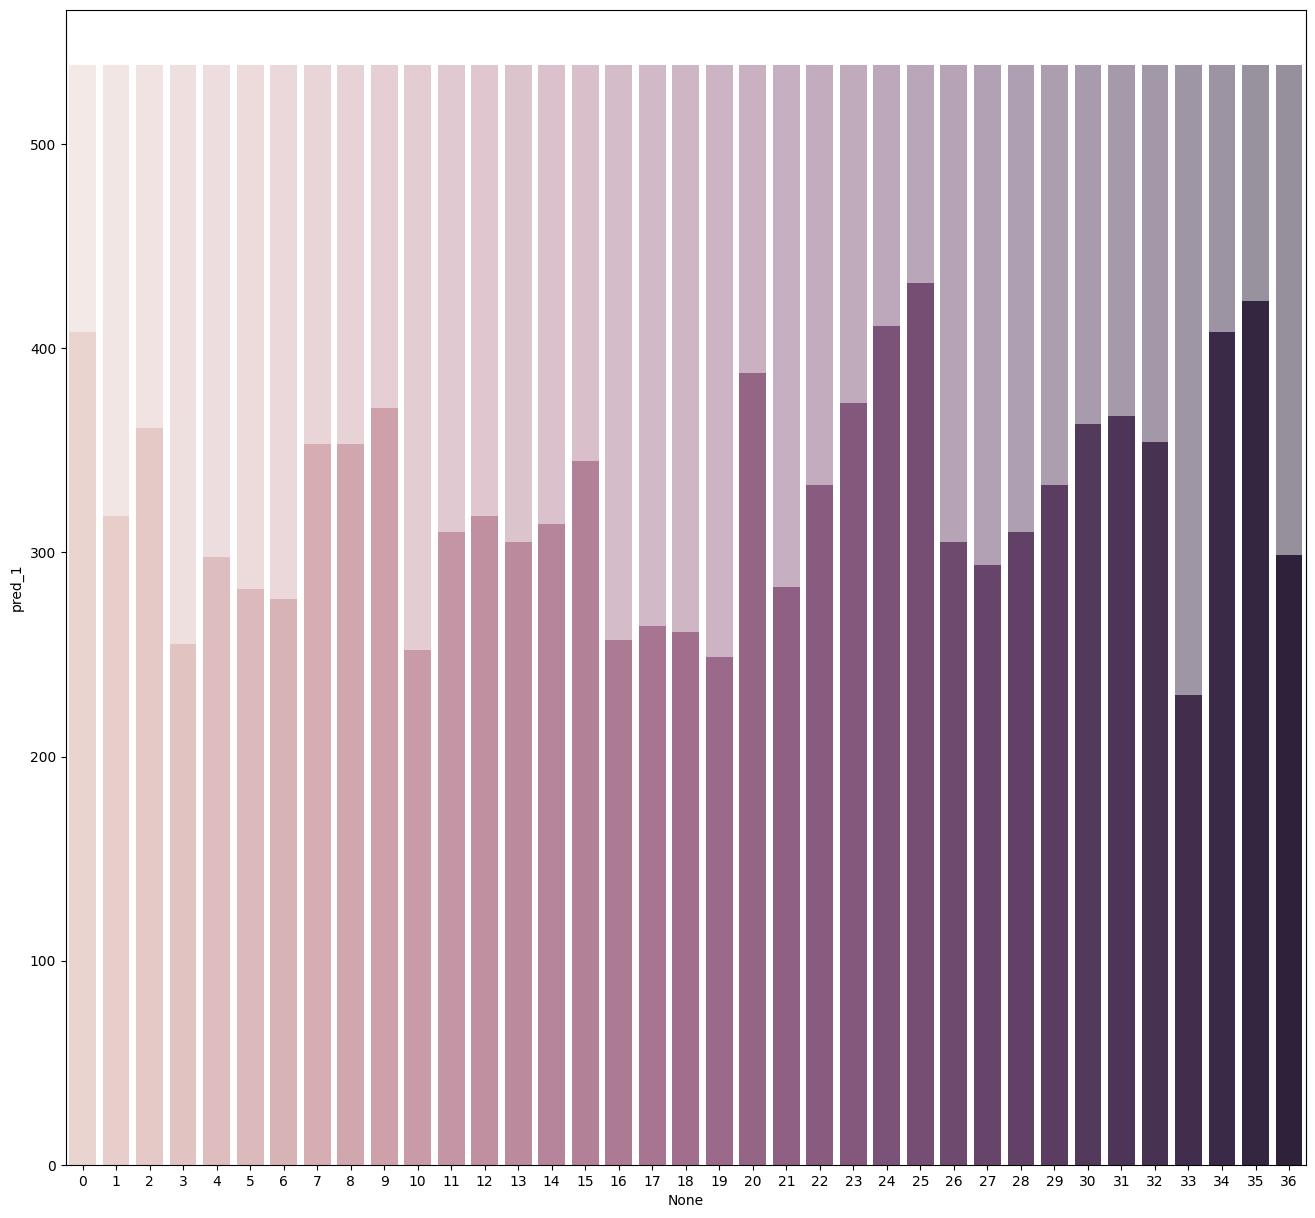

In [80]:
f,ax= plt.subplots(figsize=(16,15))
sns.barplot(x=dataframe_for_testing.index, y="pred_1", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, legend= False)
sns.barplot(x=dataframe_for_testing.index, y="sums_preds", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, alpha =0.5, legend= False)
plt.show()

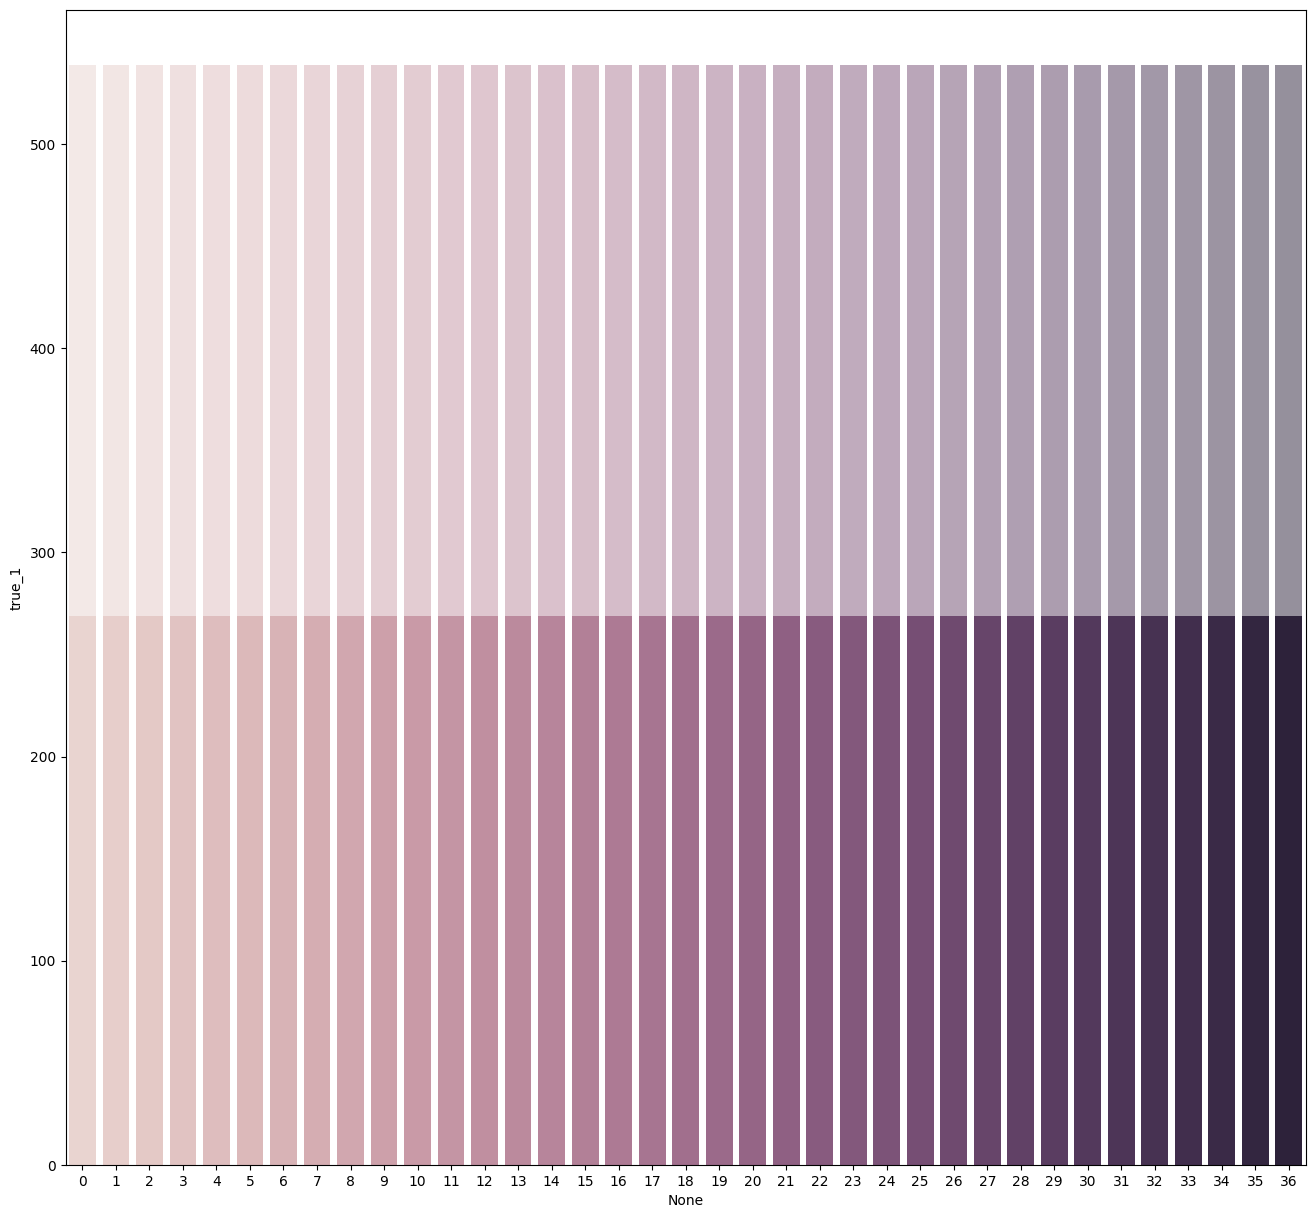

In [81]:
f,ax= plt.subplots(figsize=(16,15))
sns.barplot(x=dataframe_for_testing.index, y="true_1", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, legend= False)
sns.barplot(x=dataframe_for_testing.index, y="sums_true", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, alpha =0.5, legend= False)
plt.show()

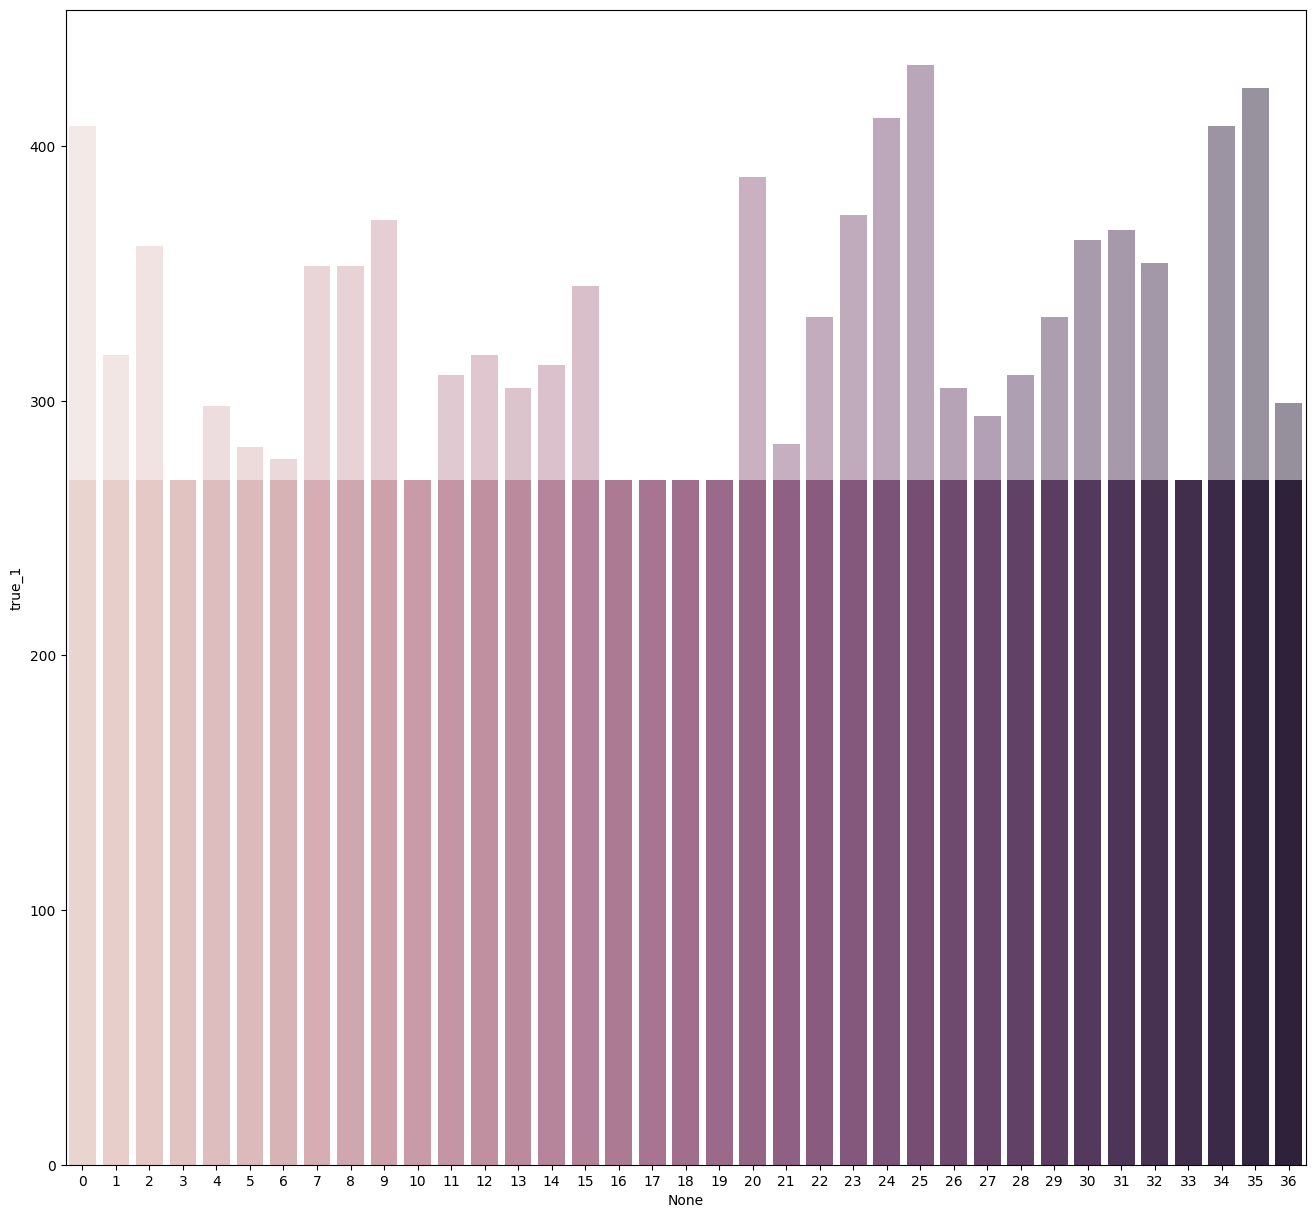

In [82]:
f,ax= plt.subplots(figsize=(16,15))
sns.barplot(x=dataframe_for_testing.index, y="true_1", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, legend= False)
sns.barplot(x=dataframe_for_testing.index, y="pred_1", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, alpha =0.5, legend= False)
plt.show()

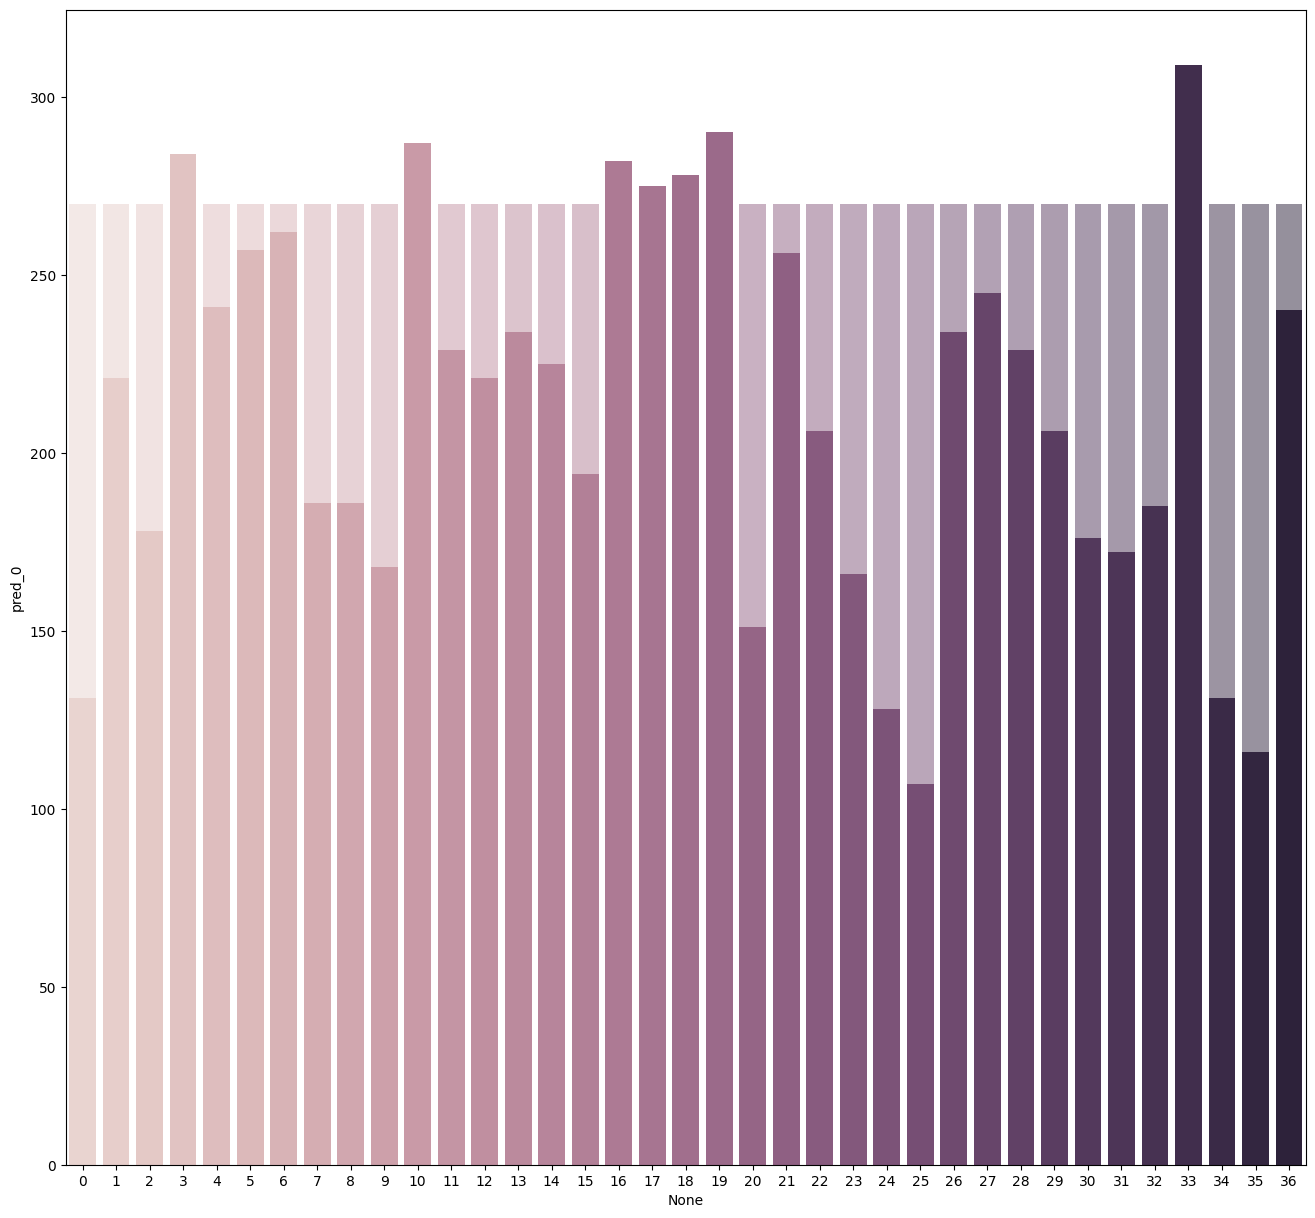

In [83]:
f,ax= plt.subplots(figsize=(16,15))
sns.barplot(x=dataframe_for_testing.index, y="pred_0", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, legend= False)
sns.barplot(x=dataframe_for_testing.index, y="true_0", data=dataframe_for_testing,hue= dataframe_for_testing.index, ax = ax, alpha =0.5, legend= False)
plt.show()

In [ ]:
roc_things1 = pd.DataFrame(roc_things1)
roc_things1.to_csv('roc_results_for_unseen_data', index = False )